## <font color = Green > Business Understanding </font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

## <font color = Green > Problem Statement </font>

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel: 

Lead generation via marketing (Top Funnel) > > Lead Nurturing (Middle Funnel) >> Converted Leads (Bottom Funnel)

## <font color = Green > Business Goal </font>

+ X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

+ Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## <font color = Green > Steps Followed </font>

1. Read and clean the data:
    + Handling missing values
    + Standardizing
    + Handling Outliers
2. Understand the data (Numeric and Categorical Analysis)
3. Exploratory Data Analysis
4. Prepare the data for modeling:
    + Feature Engineering/Mapping categorical variables to integers
    + Dummy variable creation
    + Test-train split and scaling
5. Model Building:
    + Feature elimination based on correlations
    + Feature selection using RFE
    + Running our First Model
    + Manual feature elimination (using p-values and VIFs)
    + Creating Predictions
6. Model Evaluation:
    + Accuracy
    + Sensitivity and Specificity
    + Optimal cut-off using ROC curve
    + Precision and Recall
    + F-1 Score
7. Predictions on the test set
    + Precision and Recall to verify

## 1. Read and clean the data

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting the Data Display Size

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
# read the dataset
lead = pd.read_csv('Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### <font color = Green > Insights: </font>

+ Most of the columns have non-null values i.e missing values in it. 
+ It seems they too have some unwanted and values present in them by looking at the data, will check it further. 
+ We will also check if there are any duplicates present in the data. 
+ Also, it looks like we have a lot of categorical columns that need to be scrutinize before model building. 

### Missing Values Treatment 

In [7]:
# Checking exact Null Values

def null_values(lead):
    return round((lead.isnull().sum()/len(lead)*100).sort_values(ascending = False),2)

null_values(lead)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [8]:
# Checking for unwanted values present to convert and standardised them for better analysis

df_dummy = lead.iloc[:, 1:37]
for col in df_dummy:
    print("Column Name : ", col)
    print(df_dummy[col].value_counts(ascending = False), '\n\n\n' )

Column Name :  Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64 



Column Name :  Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 



Column Name :  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM               

### <font color = Green > Insights: </font>

+ Looking at both missing values and unwanted patterns in the data we will treat the dataframe further. 
+ First, we will drop the columns having missing values > 35%, also, they seem to be irrelevant for model building as they are some characteristics captured about the lead.
+ There seem to be some columns with high missing values but high importance too, after cross-checking them with the value counts, will replace their null value with 'Not Selected'.
+ Also, there seems to be a label named 'Select' with high counts in a few of the columns i.e **Missing Completely at Random (MCAR)**, which means that the particular person has not selected any option from the dropdown. Identifying those columns and replacing them with 'Not Selected' values
+ There are also many binary response columns that seem to be important for our model-building predictions.

In [9]:
# Droping cloumns having Null Values > 35% and are irrelevant for the model building

lead.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
           'Asymmetrique Profile Score', 'Tags'], axis = 1, inplace = True)
lead.shape

(9240, 31)

In [10]:
# Replacing the missing values of rest of the columns to 'None Provided' values

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].fillna('Not Selected')
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      70.649351
Not Selected                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [11]:
lead['Lead Profile'] = lead['Lead Profile'].fillna('Not Selected')
lead['Lead Profile'].value_counts(normalize = True)*100

Select                         44.870130
Not Selected                   29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [12]:
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not Selected')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Not Selected            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [13]:
lead['Country'] = lead['Country'].fillna('Not Selected')
lead['Country'].value_counts(normalize = True)*100

India                   70.259740
Not Selected            26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [14]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna('Not Selected')
lead['How did you hear about X Education'].value_counts(normalize = True)*100

Select                   54.577922
Not Selected             23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [15]:
lead['Specialization'] = lead['Specialization'].fillna('Not Selected')
lead['Specialization'].value_counts(normalize = True)*100

Select                               21.017316
Not Selected                         15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [16]:
lead['City'] = lead['City'].fillna('Not Selected')
lead['City'].value_counts(normalize = True)*100

Mumbai                         34.870130
Select                         24.339827
Not Selected                   15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [17]:
# Replacing all the cloumns having 'Select' values with 'Not Selected'

lead = lead.replace('Select', 'Not Selected')

In [18]:
# Rechecking the null values

null_values(lead)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
Receive More Updates About Our Courses           0.00
Update me on Supply Chain Content                0.00
Get updates on DM Content                        0.00
Newspaper Article                                0.00
Lead Profile                                     0.00
City                                             0.00
I agree to pay the amount through cheque         0.00
A free copy of Mastering The Interview           0.00
X Education Forums                               0.00
What matters most to you in choosing a course    0.00
Magazine                    

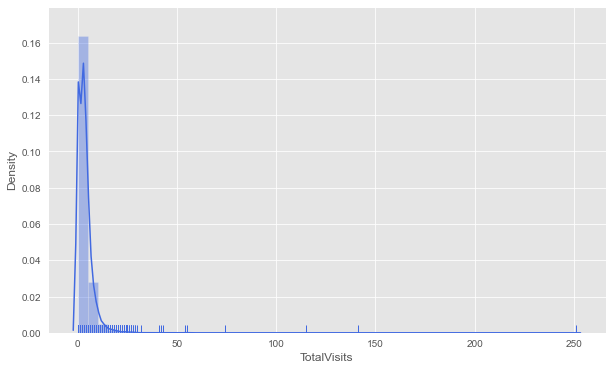

In [19]:
# Identifying the spread of TotalVisits Range

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(lead['TotalVisits'], rug = True, color = 'royalblue')
plt.show()

In [20]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [21]:
lead['TotalVisits'].fillna(lead['TotalVisits'].mean(), axis = 0, inplace = True)

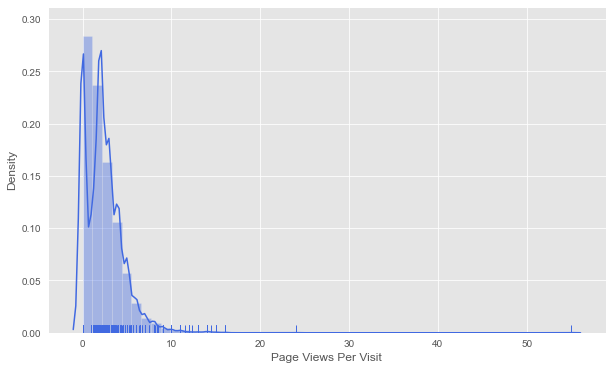

In [22]:
# Identifying the spread of Page Views Per Visit Range

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(lead['Page Views Per Visit'], rug = True, color = 'royalblue')
plt.show()

In [23]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [24]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mean(), axis = 0, inplace = True)

### <font color = Green > Rule Followed </font>

Above numerical columns are expected to fill msising values over here using the following rules:

1. If Mean ~ Median approximately, substitute by mean.

2. If Mean != median, substitute by median 

3. but if there is a huge difference in mean and max, subsitute if by mode.

In [25]:
lead['Last Activity'].fillna(lead['Last Activity'].mode()[0], axis = 0, inplace = True)

In [26]:
lead['Lead Source'].fillna(lead['Lead Source'].mode()[0], axis = 0, inplace = True)

In [27]:
# Rechecking the missing values
null_values(lead)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
How did you hear about X Education            

In [28]:
# Checking for of missing values in rows

def null_values_row(lead):
    return (lead.isnull().sum(axis=1)/len(lead)*100).sort_values(ascending = False)

null_values_row(lead)[null_values_row(lead)>0]

Series([], dtype: float64)

### <font color = Red >  Datafram is free from of Null Values in Rows and Columns:  </font>

In [29]:
lead.shape

(9240, 31)

In [30]:
# Dropping duplicate rows
lead = lead.drop_duplicates()
lead.shape

(9240, 31)

### Standardization

In [31]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [32]:
# Replacing Columns Names to bring more sophistication 

lead.rename(columns = {'TotalVisits': 'Total Visits','Total Time Spent on Website' : 'Time on Website', 'How did you hear about X Education': 'Source Reference',
                      'What is your current occupation': 'Occupation Status', 'What matters most to you in choosing a course' : 'Course Selection Criteria', 
                      'Receive More Updates About Our Courses': 'Course Content Updates', 'Update me on Supply Chain Content' : 'Supply Chain Updates', 
                       'Get updates on DM Content' : 'Updates on DM', 'I agree to pay the amount through cheque' : 'Cheque Payment', 
                       'A free copy of Mastering The Interview': 'Interview Mastering Copy'}, inplace = True)
lead.head(5)

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  Total Visits  Time on Website  Page Views Per Visit            Last Activity       Country           Specialization Source Reference Occupation Status Course Selection Criteria Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Course Content Updates Supply Chain Updates Updates on DM    Lead Profile          City Cheque Payment Interview Mastering Copy Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0           0.0                0                   0.0  Page Visited on Website  Not Selected             Not Selected     Not Selected        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No    Not Selected  Not Selected             No                       No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0           5.0              674                   2.5             Email Opened         India             Not Selected     Not Selected        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No    Not Selected  Not Selected             No                       No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1           2.0             1532                   2.0             Email Opened         India  Business Administration     Not Selected           Student   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No  Potential Lead        Mumbai             No                      Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0           1.0              305                   1.0              Unreachable         India    Media and Advertising    Word Of Mouth        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No    Not Selected        Mumbai             No                       No              Modified
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission          Google           No          No          1           2.0             1428                   1.0        Converted to Lead         India             Not Selected            Other        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No    Not Selected        Mumbai             No                       No              Modified

In [33]:
# Replacing Columns Nomenclature to bring more sophistication 

lead.columns = lead.columns.str.replace(' ', '_').str.lower()
lead.head(1)

prospect_id  lead_number lead_origin lead_source do_not_email do_not_call  converted  total_visits  time_on_website  page_views_per_visit            last_activity       country specialization source_reference occupation_status course_selection_criteria search magazine newspaper_article x_education_forums newspaper digital_advertisement through_recommendations course_content_updates supply_chain_updates updates_on_dm  lead_profile          city cheque_payment interview_mastering_copy last_notable_activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737         API  Olark Chat           No          No          0           0.0                0                   0.0  Page Visited on Website  Not Selected   Not Selected     Not Selected        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No  Not Selected  Not Selected             No                       No              Modified

## 2. Understand the data (Numeric and Categorical Analysis)

In [34]:
# Check the summary for the numeric columns 

lead.describe()

lead_number    converted  total_visits  time_on_website  page_views_per_visit
count    9240.000000  9240.000000   9240.000000      9240.000000           9240.000000
mean   617188.435606     0.385390      3.445238       487.698268              2.362820
std     23405.995698     0.486714      4.818723       548.021466              2.145333
min    579533.000000     0.000000      0.000000         0.000000              0.000000
25%    596484.500000     0.000000      1.000000        12.000000              1.000000
50%    615479.000000     0.000000      3.000000       248.000000              2.000000
75%    637387.250000     1.000000      5.000000       936.000000              3.000000
max    660737.000000     1.000000    251.000000      2272.000000             55.000000

### <font color = Green > Insights </font>

+ We can clearly some loyal and dedicated customers as total_visits has a huge jump from between 75% quantile and max value which is 251. 
+ The time spent on website metric display a average time spent by a customer is around 8.11 mins, which is a good number as per industry standards. 
+ On the other hand, a good page views per vist should be more than 4 pages, well in this case it is below average. 

In [35]:
# Analysing categorical values

lead.select_dtypes(include=['object']).describe()

prospect_id              lead_origin lead_source do_not_email do_not_call last_activity country specialization source_reference occupation_status course_selection_criteria search magazine newspaper_article x_education_forums newspaper digital_advertisement through_recommendations course_content_updates supply_chain_updates updates_on_dm  lead_profile          city cheque_payment interview_mastering_copy last_notable_activity
count                                   9240                     9240        9240         9240        9240          9240    9240           9240             9240              9240                      9240   9240     9240              9240               9240      9240                  9240                    9240                   9240                 9240          9240          9240          9240           9240                     9240                  9240
unique                                  9240                        5          21            2           2            17      39             19               10                 7                         4      2        1                 2                  2         2                     2                       2                      1                    1             1             6             7              1                        2                    16
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission      Google           No          No  Email Opened   India   Not Selected     Not Selected        Unemployed   Better Career Prospects     No       No                No                 No        No                    No                      No                     No                   No            No  Not Selected  Not Selected             No                       No              Modified
freq                                       1                     4886        2904         8506        9238          3540    6492           3380             7250              5600                      6528   9226     9240              9238               9239      9239                  9236                    9233                   9240                 9240          9240          6855          3669           9240                     6352                  3407

### <font color = Green > Insights </font>

+ Google seem to be the top source in generating leads. 
+ Most of the has checked their email by opening it. 
+ Most of the leads belong to India. 
+ Many of them have not selected their specialization, source_reference.  
+ Most of them are unemployed
+ Better career Prospects is the most top course selection criteria
+ Most of the leads have not seen magazine, newspaper_article, x_education_forums, newspaper, digital_advertisement or search about them on any browser. 

In [36]:
# Droping prospect_id column as seem irrelevant for further analysis
lead.drop('prospect_id', axis = 1, inplace = True)

In [37]:
# Checking the ratio of coverted and non-converted leads in the dataframe. 
lead.converted.value_counts(normalize = True)*100

0    61.461039
1    38.538961
Name: converted, dtype: float64

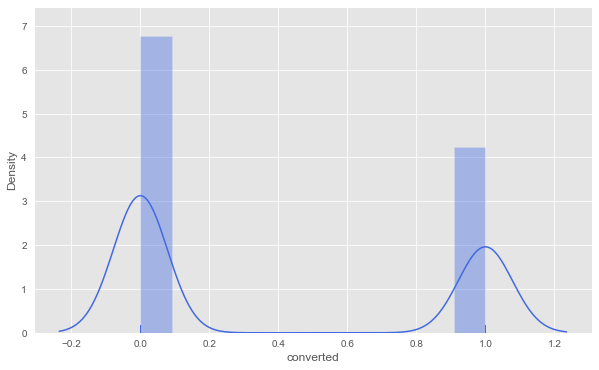

In [38]:
# Identifying the spread of Converted Leads: 

sns.set_style("dark")
plt.style.use("ggplot")
plt.figure(figsize=[10,6])
sns.distplot(lead['converted'], rug = True, color = 'royalblue')
plt.show()

### <font color = Green > Insights </font>

The Coversion Rate was 38.54%

### Identifying Outliers

In [39]:
# Will only take those numeric columns that are relevant to analyse: 

outliers_num_cols = ['total_visits', 'time_on_website', 'page_views_per_visit']

In [40]:
list(enumerate(outliers_num_cols))

[(0, 'total_visits'), (1, 'time_on_website'), (2, 'page_views_per_visit')]

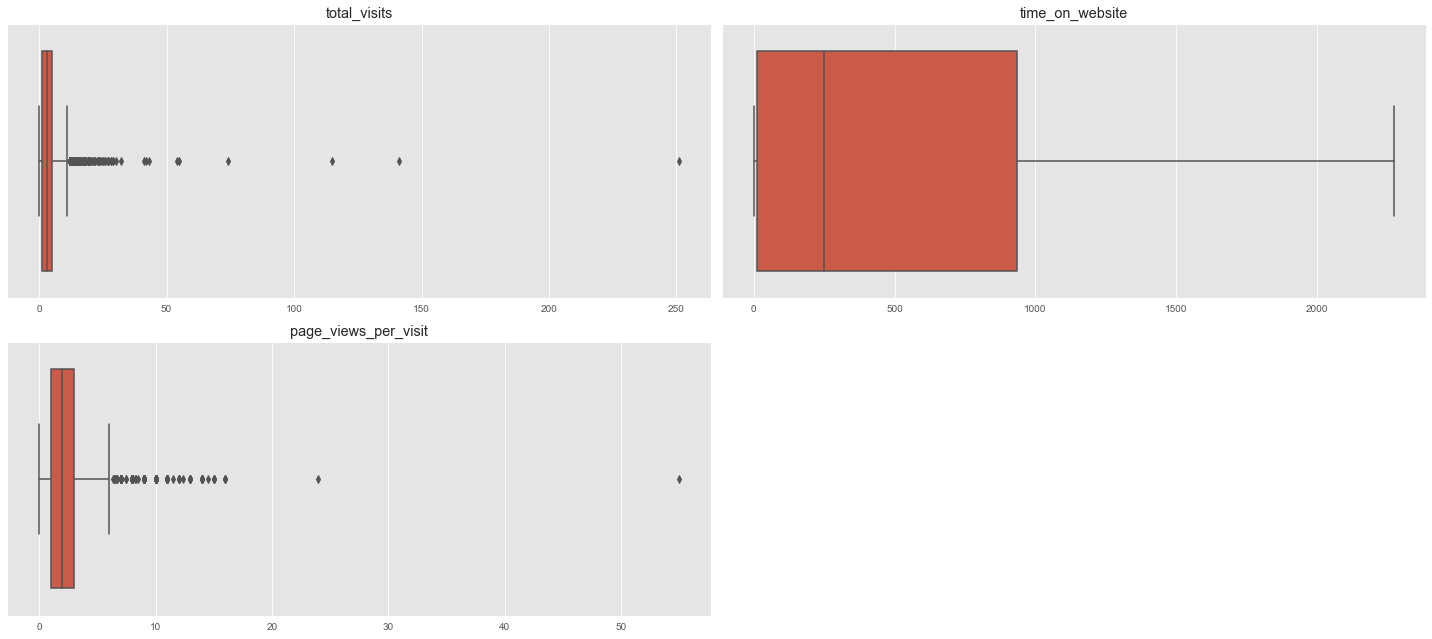

In [41]:
plt.figure(figsize=([20,22]))

for n,col in enumerate(outliers_num_cols):
    plt.subplot(5,2,n+1)
    sns.boxplot(lead[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

### <font color = Green > Insights </font>

+ There are major outliers in total_visits and page_views_per_visit. 
+ Handling the outliers with capping them. 

In [42]:
# capping (statistical) outliers

# outlier treatment for total_visits: 
Q1 = lead.total_visits.quantile(0.10) 
Q3 = lead.total_visits.quantile(0.90) 
IQR = Q3 - Q1  
lead = lead[(lead.total_visits >= Q1 - 1.5*IQR) & (lead.total_visits <= Q3 + 1.5*IQR)]

# outlier treatment for page_views_per_visit: 
Q1 = lead.page_views_per_visit.quantile(0.10) 
Q3 = lead.page_views_per_visit.quantile(0.90) 
IQR = Q3 - Q1  
lead = lead[(lead.page_views_per_visit >= Q1 - 1.5*IQR) & (lead.page_views_per_visit <= Q3 + 1.5*IQR)]

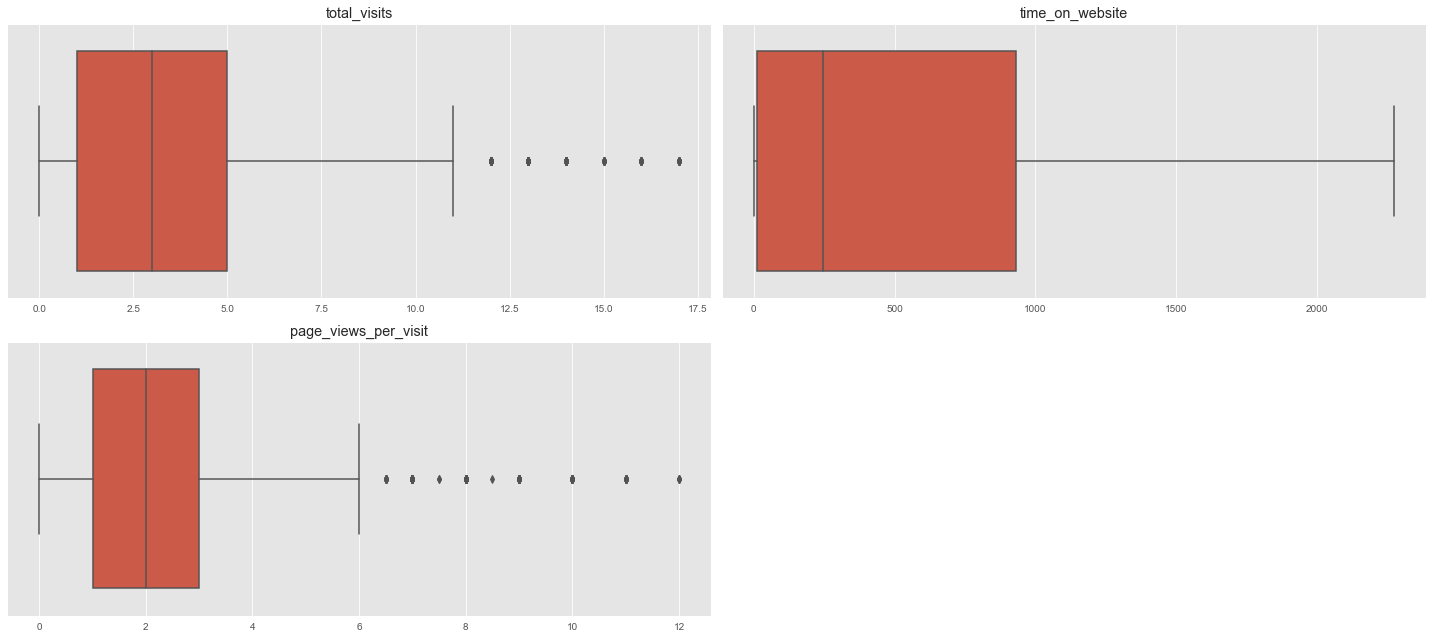

In [43]:
plt.figure(figsize=([20,22]))

for n,col in enumerate(outliers_num_cols):
    plt.subplot(5,2,n+1)
    sns.boxplot(lead[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

### <font color = Green > Insights </font>

+ Outliers are significantly reduced and capped. 

## 3. Exploratory Data Analysis

In [44]:
# Univariate Analysis

Landing Page Submission    52.572242
API                        38.966725
Lead Add Form               7.848074
Lead Import                 0.602014
Quick Add Form              0.010946
Name: lead_origin, dtype: float64


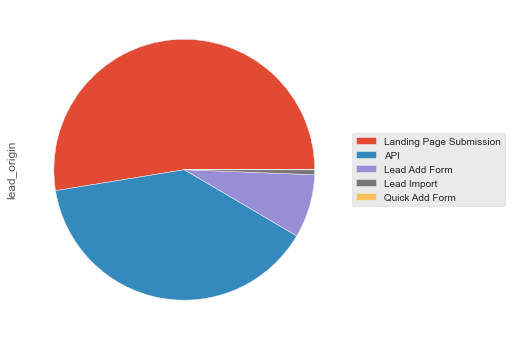

Google               31.545534
Direct Traffic       27.440893
Olark Chat           19.187828
Organic Search       12.215412
Reference             5.834063
Welingak Website      1.554291
Referral Sites        1.313485
Facebook              0.602014
bing                  0.065674
google                0.054729
Click2call            0.043783
Press_Release         0.021891
Social Media          0.021891
Live Chat             0.021891
youtubechannel        0.010946
testone               0.010946
Pay per Click Ads     0.010946
welearnblog_Home      0.010946
WeLearn               0.010946
blog                  0.010946
NC_EDM                0.010946
Name: lead_source, dtype: float64


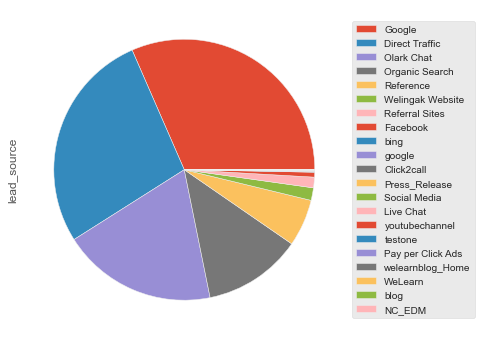

No     92.184764
Yes     7.815236
Name: do_not_email, dtype: float64


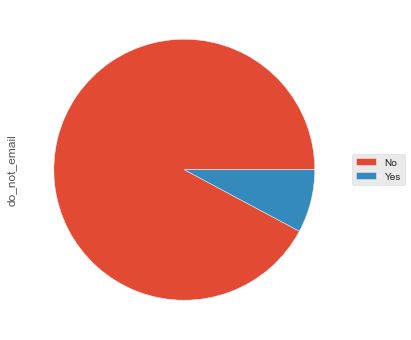

No     99.978109
Yes     0.021891
Name: do_not_call, dtype: float64


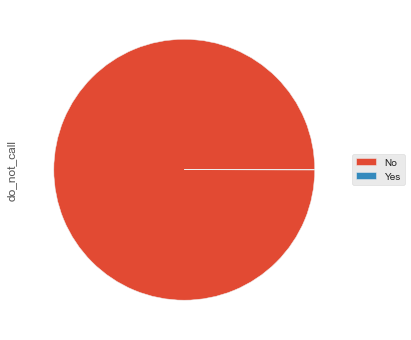

Email Opened                    38.408494
SMS Sent                        29.816112
Olark Chat Conversation         10.606392
Page Visited on Website          6.567426
Converted to Lead                4.684764
Email Bounced                    3.557356
Email Link Clicked               2.911559
Form Submitted on Website        1.247811
Unreachable                      0.996060
Unsubscribed                     0.667688
Had a Phone Conversation         0.317426
Approached upfront               0.098511
View in browser link Clicked     0.054729
Email Received                   0.021891
Email Marked Spam                0.021891
Visited Booth in Tradeshow       0.010946
Resubscribed to emails           0.010946
Name: last_activity, dtype: float64


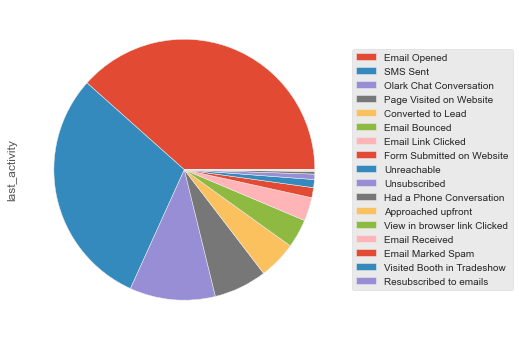

India                   69.954028
Not Selected            26.937391
United States            0.744308
United Arab Emirates     0.569177
Singapore                0.262697
Saudi Arabia             0.229860
United Kingdom           0.164186
Australia                0.142294
Qatar                    0.109457
Bahrain                  0.076620
Hong Kong                0.076620
Oman                     0.065674
France                   0.065674
Kuwait                   0.043783
unknown                  0.043783
South Africa             0.043783
Canada                   0.043783
Nigeria                  0.043783
Germany                  0.043783
Sweden                   0.032837
Philippines              0.021891
Uganda                   0.021891
Italy                    0.021891
Bangladesh               0.021891
Netherlands              0.021891
Asia/Pacific Region      0.021891
China                    0.021891
Belgium                  0.021891
Ghana                    0.021891
Kenya         

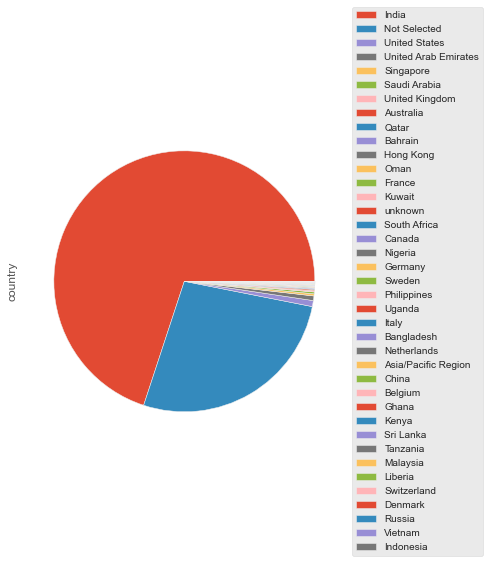

Not Selected                         36.832312
Finance Management                   10.562609
Human Resource Management             9.139667
Marketing Management                  9.095884
Operations Management                 5.483800
Business Administration               4.334501
IT Projects Management                3.951401
Supply Chain Management               3.787215
Banking, Investment And Insurance     3.601138
Media and Advertising                 2.178196
Travel and Tourism                    2.145359
International Business                1.915499
Healthcare Management                 1.685639
Hospitality Management                1.225919
E-COMMERCE                            1.204028
Retail Management                     1.039842
Rural and Agribusiness                0.766200
E-Business                            0.612960
Services Excellence                   0.437828
Name: specialization, dtype: float64


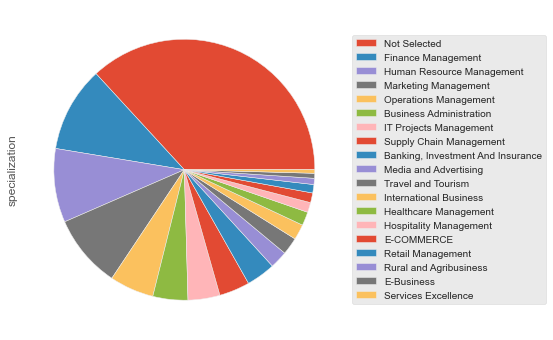

Not Selected             78.502627
Online Search             8.690893
Word Of Mouth             3.765324
Student of SomeSchool     3.393170
Other                     1.992119
Multiple Sources          1.663748
Advertisements            0.733363
Social Media              0.722417
Email                     0.284588
SMS                       0.251751
Name: source_reference, dtype: float64


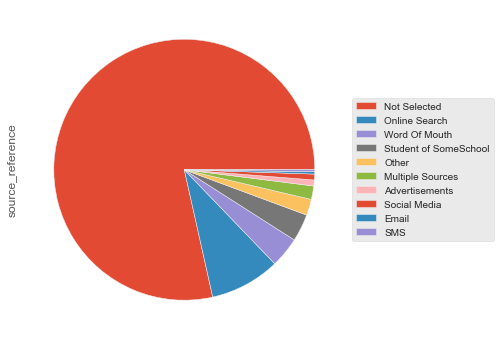

Unemployed              60.551664
Not Selected            29.159370
Working Professional     7.651051
Student                  2.287653
Other                    0.153240
Housewife                0.109457
Businessman              0.087566
Name: occupation_status, dtype: float64


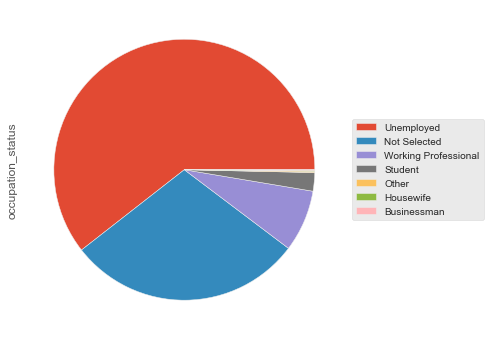

Better Career Prospects      70.610771
Not Selected                 29.356392
Flexibility & Convenience     0.021891
Other                         0.010946
Name: course_selection_criteria, dtype: float64


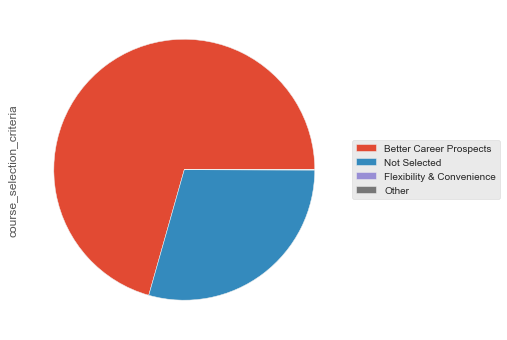

No     99.857706
Yes     0.142294
Name: search, dtype: float64


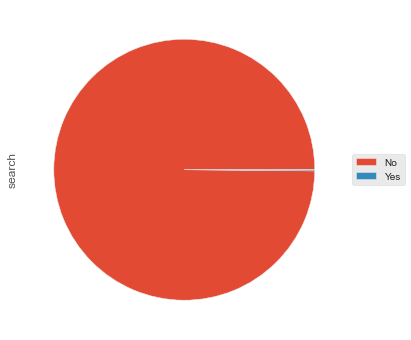

No    100.0
Name: magazine, dtype: float64


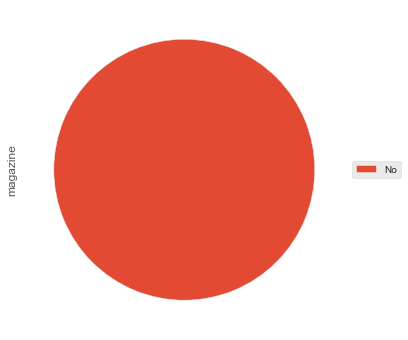

No     99.989054
Yes     0.010946
Name: newspaper_article, dtype: float64


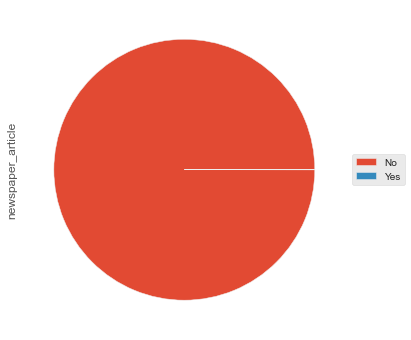

No    100.0
Name: x_education_forums, dtype: float64


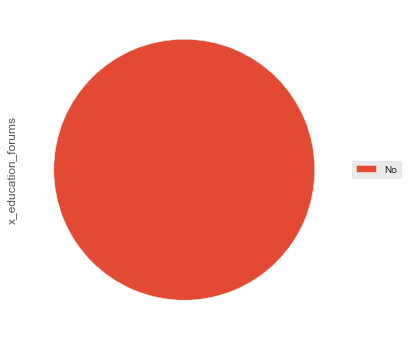

No     99.989054
Yes     0.010946
Name: newspaper, dtype: float64


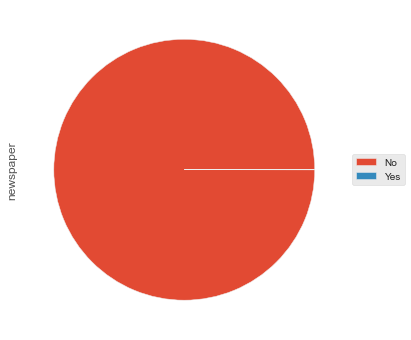

No     99.967163
Yes     0.032837
Name: digital_advertisement, dtype: float64


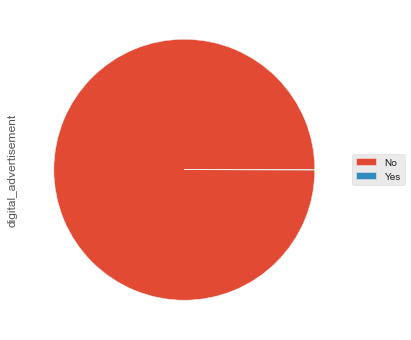

No     99.934326
Yes     0.065674
Name: through_recommendations, dtype: float64


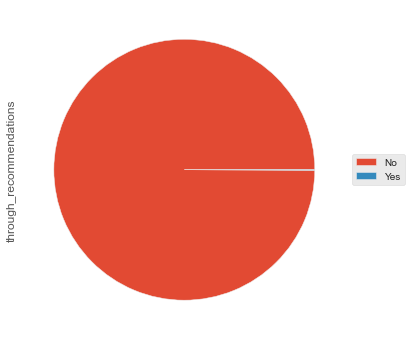

No    100.0
Name: course_content_updates, dtype: float64


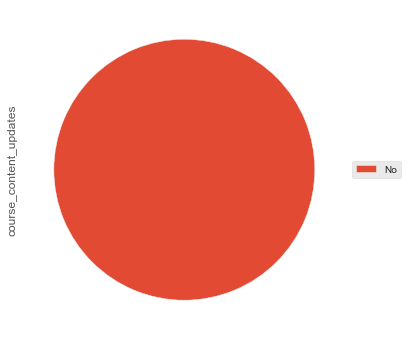

No    100.0
Name: supply_chain_updates, dtype: float64


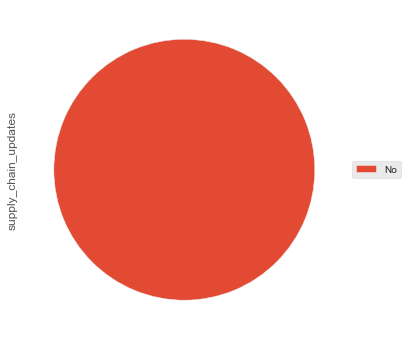

No    100.0
Name: updates_on_dm, dtype: float64


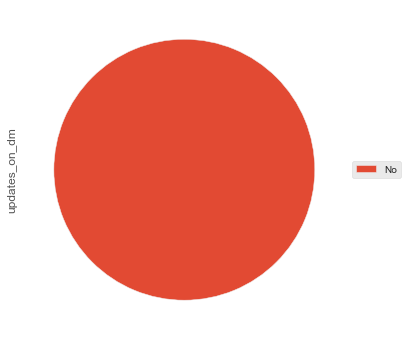

Not Selected                   74.211909
Potential Lead                 17.425569
Other Leads                     5.253940
Student of SomeSchool           2.626970
Lateral Student                 0.262697
Dual Specialization Student     0.218914
Name: lead_profile, dtype: float64


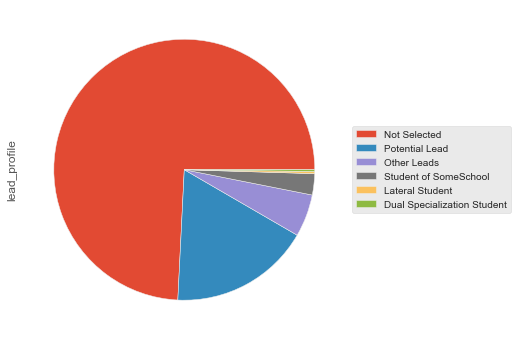

Not Selected                   40.017513
Mumbai                         34.697898
Thane & Outskirts               8.066988
Other Cities                    7.410245
Other Cities of Maharashtra     4.947461
Other Metro Cities              4.060858
Tier II Cities                  0.799037
Name: city, dtype: float64


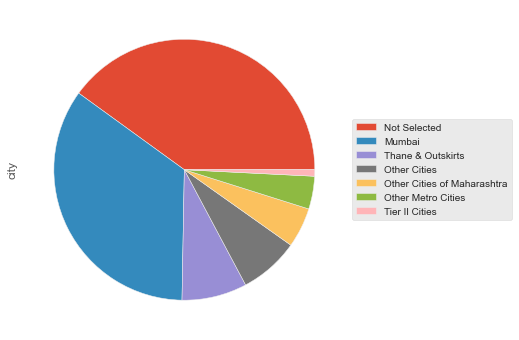

No    100.0
Name: cheque_payment, dtype: float64


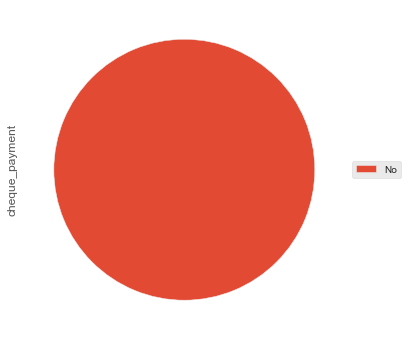

No     69.089317
Yes    30.910683
Name: interview_mastering_copy, dtype: float64


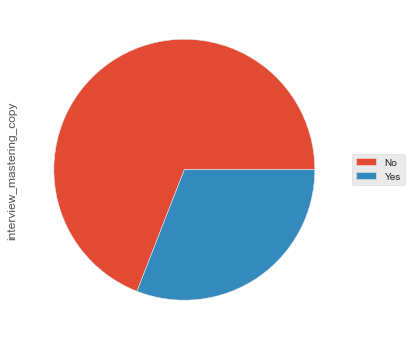

Modified                        36.996497
Email Opened                    30.647986
SMS Sent                        23.588004
Page Visited on Website          3.163310
Olark Chat Conversation          1.992119
Email Link Clicked               1.882662
Email Bounced                    0.645797
Unsubscribed                     0.514448
Unreachable                      0.350263
Had a Phone Conversation         0.142294
Email Marked Spam                0.021891
Approached upfront               0.010946
Resubscribed to emails           0.010946
View in browser link Clicked     0.010946
Form Submitted on Website        0.010946
Email Received                   0.010946
Name: last_notable_activity, dtype: float64


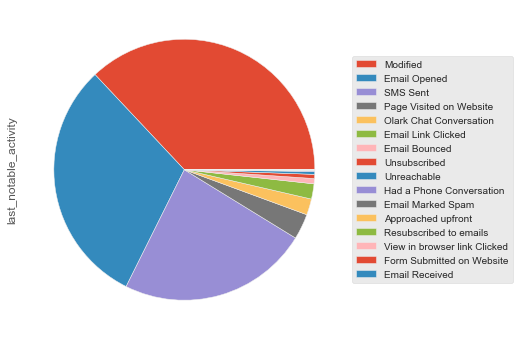

In [45]:
# Univatriate Categorical Analysis for better understanding of those columns:

for i in lead.columns:
    if lead[i].dtypes ==  "object":
        print(lead[i].value_counts(normalize = True)*100)
        plt.figure(figsize=[6,6])
        lead[i].value_counts(normalize = True).plot.pie(labeldistance=None)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        #plt.tight_layout()
        plt.show()

### <font color = Green > Insights </font>

+ Most of the leads have originated from submitting a form on Landing page followed by details fetched through API's. 
+ Apart from Google ads, most of the leads have been sourced through direct traffic on the website, Olark Chart, Organic Search and few Reference. 
+ Apart from email, most of the leads were also active via SMS  and Olark Chat conversations. 
+ Highest number of leads specialized in Finance Management followed by HR management and Marketing management. 
+ Many of them has been referred through online search and then follower word of mouth and student of some school. 
+ Apart of being unemployed, the next higest occupation of leads are working professional and students followed by very few housewifes and buisenessman. 
+ Most of the leads are from Mumbai city folowed by Thane & Outskirts. 

**We might have to standardise few of the columns in data preparation for dummy variable creation before model building**

In [46]:
# Bi-variate and Multivariate Analysis

In [47]:
# Analysing the characteristics of leads in categorical columns with respected to Converted ratio.  

def bivariate_categorical(a1,a2):
    plt.figure(figsize=(8, 8))
    sns.catplot(col=a1 ,y=a2, data=lead, kind="count")
    plt.show()

<Figure size 576x576 with 0 Axes>

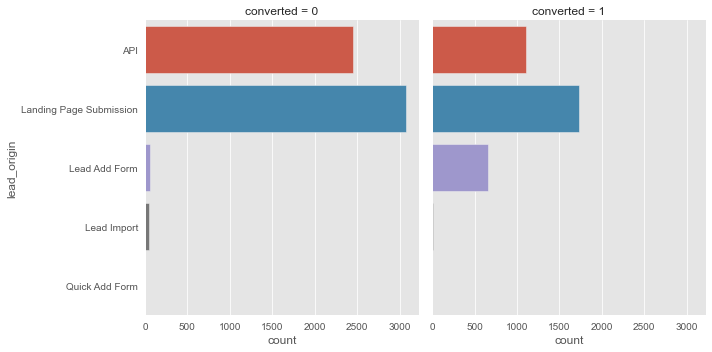

<Figure size 576x576 with 0 Axes>

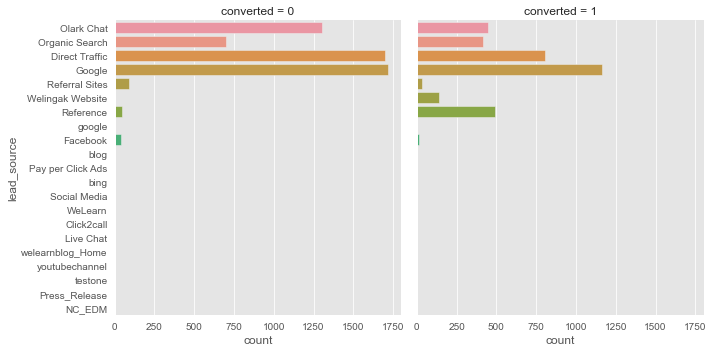

<Figure size 576x576 with 0 Axes>

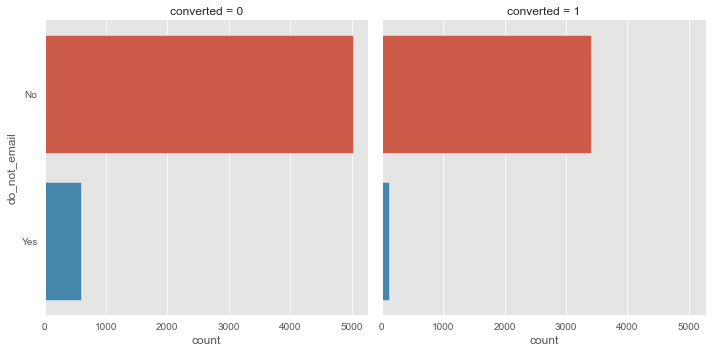

<Figure size 576x576 with 0 Axes>

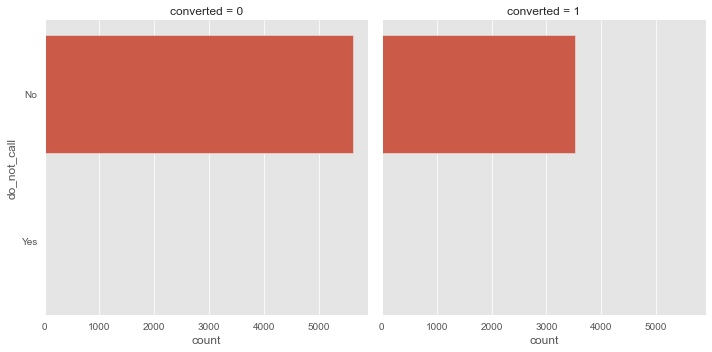

<Figure size 576x576 with 0 Axes>

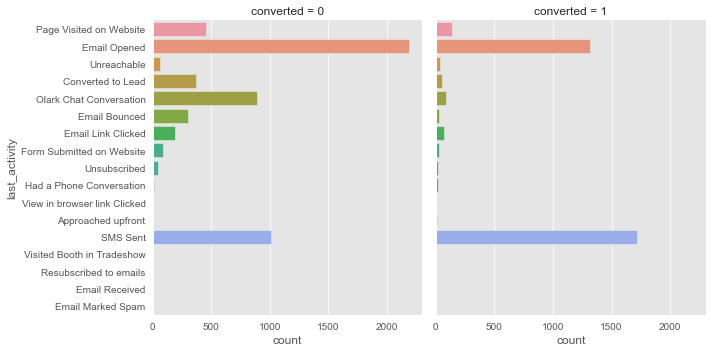

<Figure size 576x576 with 0 Axes>

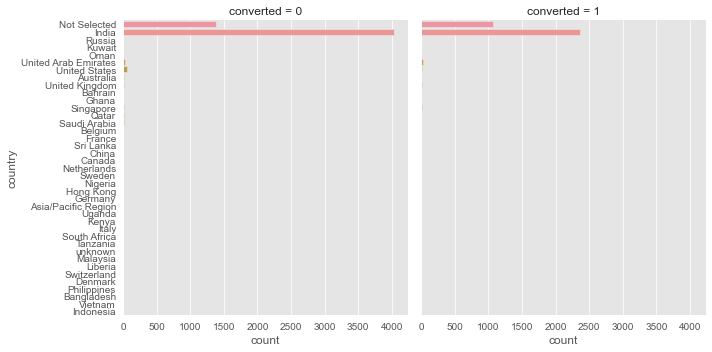

<Figure size 576x576 with 0 Axes>

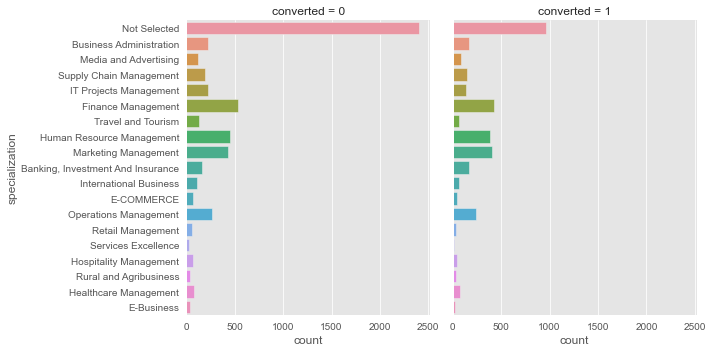

<Figure size 576x576 with 0 Axes>

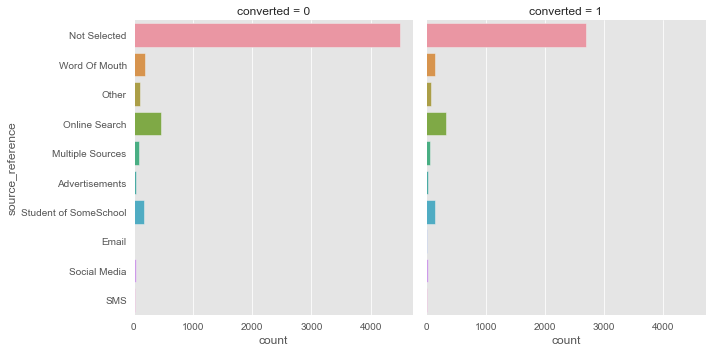

<Figure size 576x576 with 0 Axes>

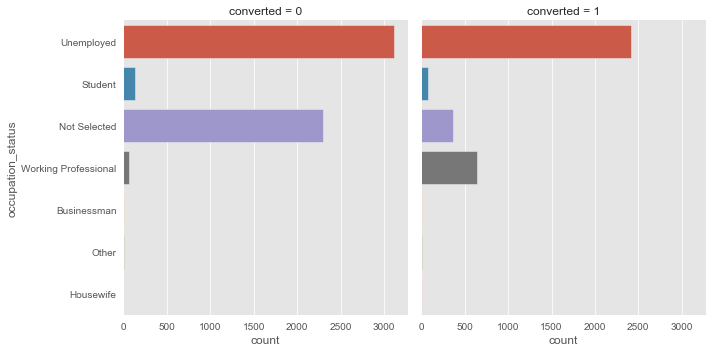

<Figure size 576x576 with 0 Axes>

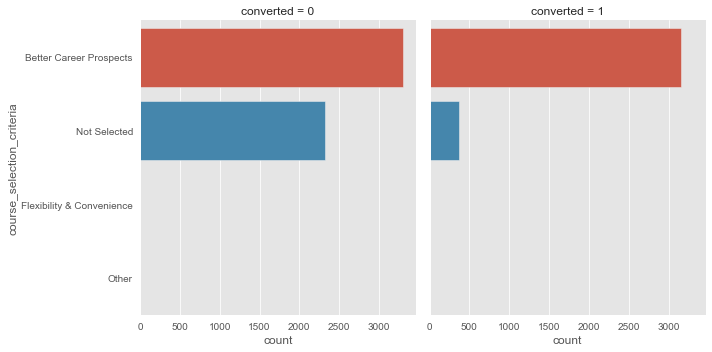

<Figure size 576x576 with 0 Axes>

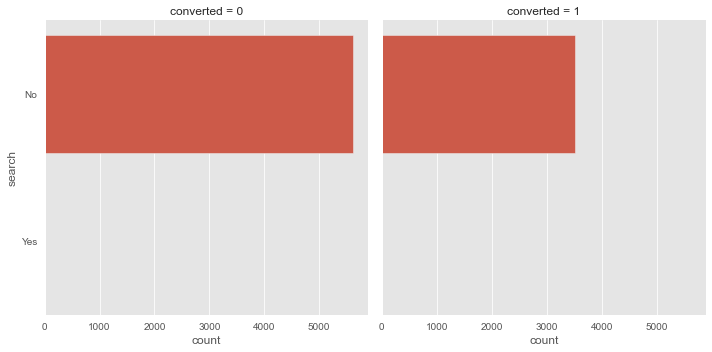

<Figure size 576x576 with 0 Axes>

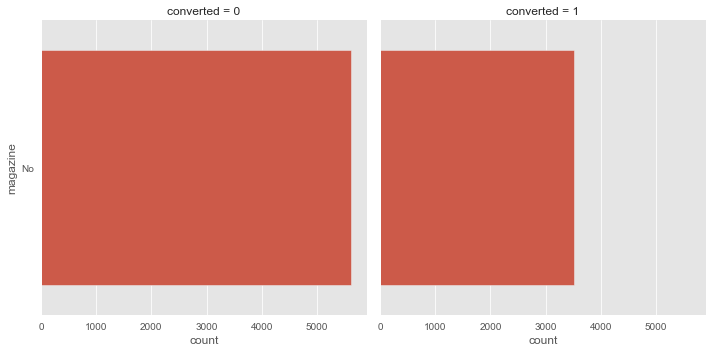

<Figure size 576x576 with 0 Axes>

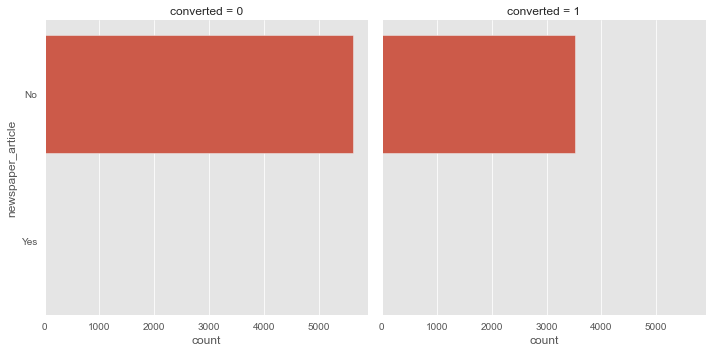

<Figure size 576x576 with 0 Axes>

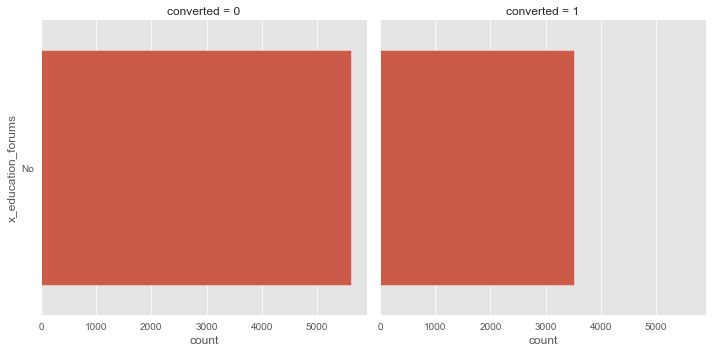

<Figure size 576x576 with 0 Axes>

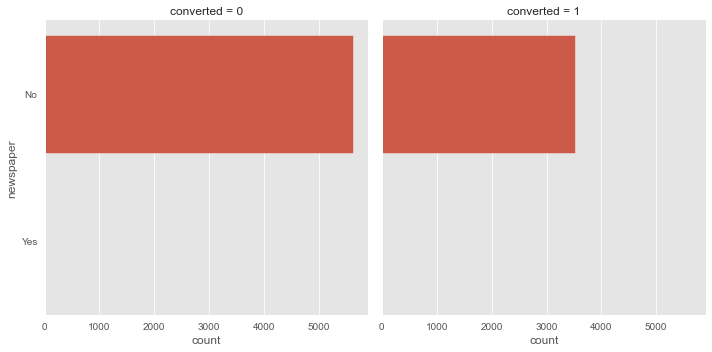

<Figure size 576x576 with 0 Axes>

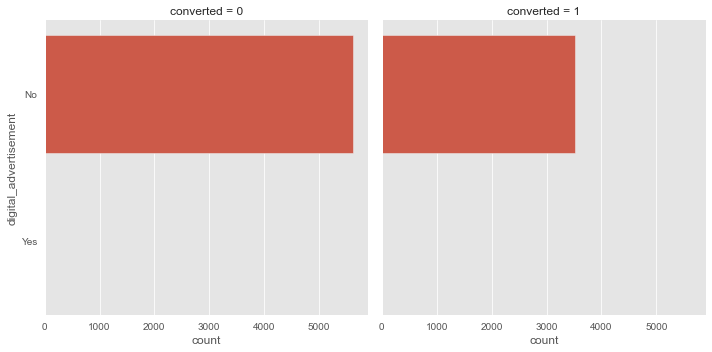

<Figure size 576x576 with 0 Axes>

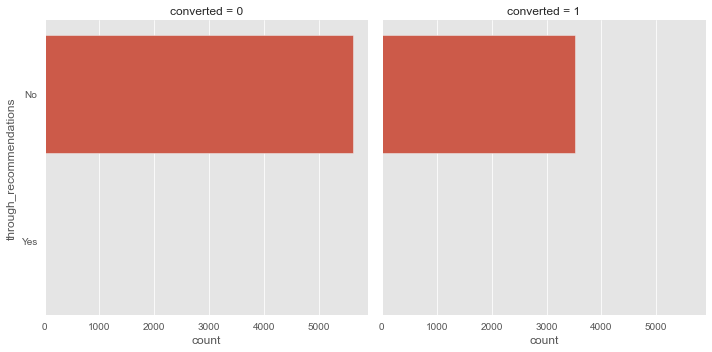

<Figure size 576x576 with 0 Axes>

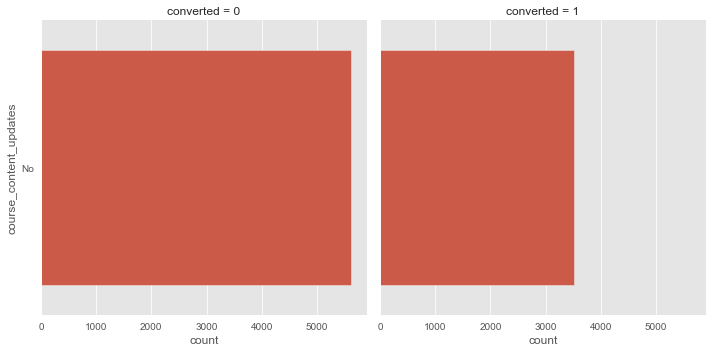

<Figure size 576x576 with 0 Axes>

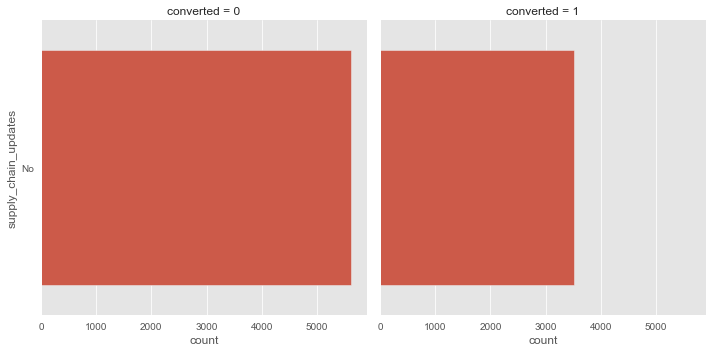

<Figure size 576x576 with 0 Axes>

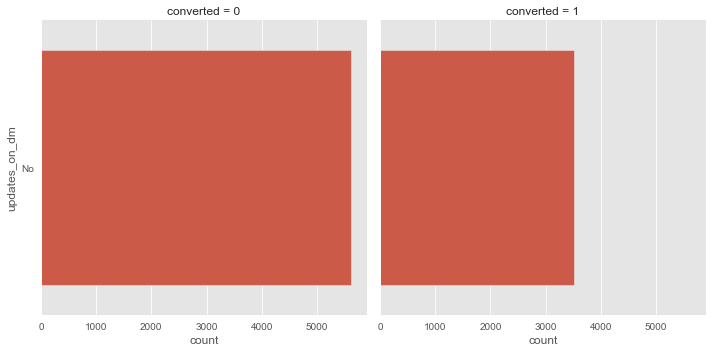

<Figure size 576x576 with 0 Axes>

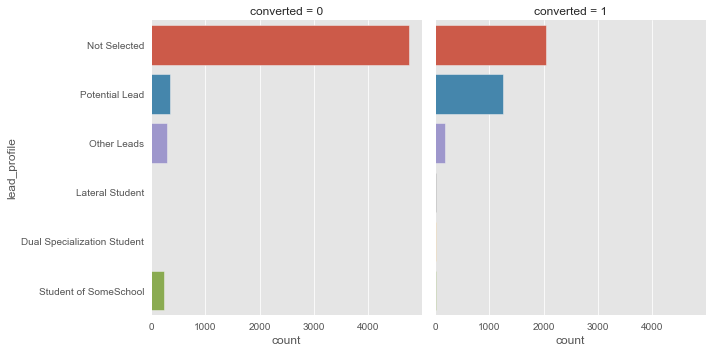

<Figure size 576x576 with 0 Axes>

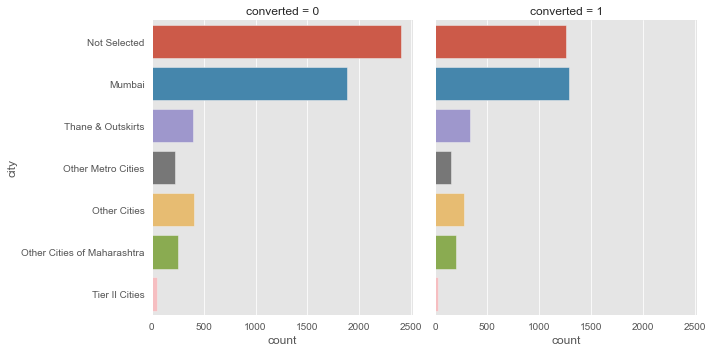

<Figure size 576x576 with 0 Axes>

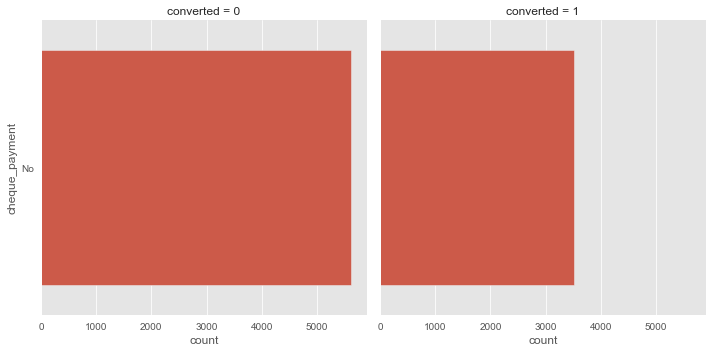

<Figure size 576x576 with 0 Axes>

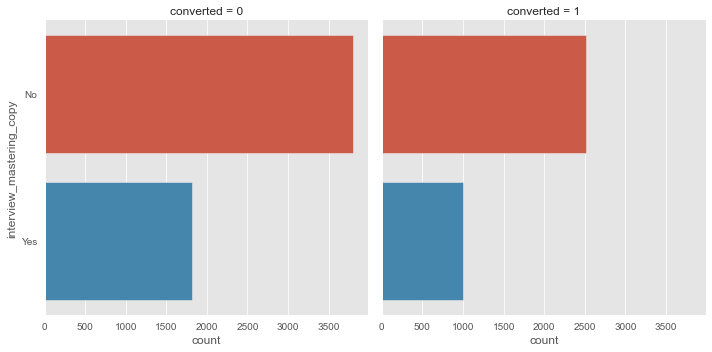

<Figure size 576x576 with 0 Axes>

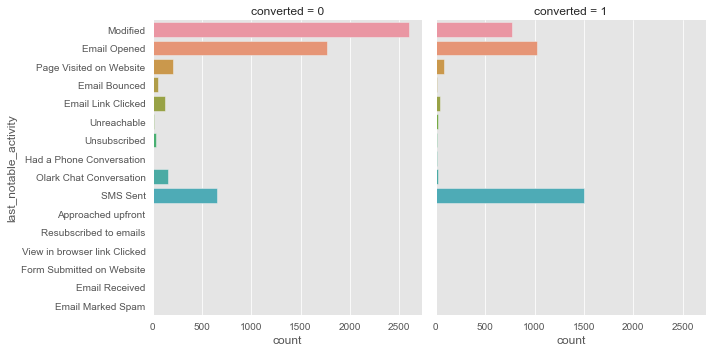

In [48]:
for i in lead.columns:
    if lead[i].dtypes ==  "object":
        bivariate_categorical('converted',i)
        plt.show()

### <font color = Green > Insights </font>

+ There are few converted leads that are originated from Lead Add form which seems to be working apart from API and Lead Page Submission. We can work on the content of the form or make it more inquisitive to optimise it in the future. 
+ Facebook, blogs, PPC, and others are definitely not working for us in converting leads. 
+ SMS seems to be much active in conversion than email. 
+ Data seems to be skewed towards India. 
+ Why most of the converted leads are not providing their source_reference, occupation_status, specialization, country and city too?

In [49]:
# Analysing the characteristics of leads in numerical columns with respected to Converted ratio.  

def bivariate_numerical(a1,a2):
    plt.figure(figsize=(8, 8))
    ax = sns.boxplot(x=a1, y=a2, data=lead)
    plt.show()

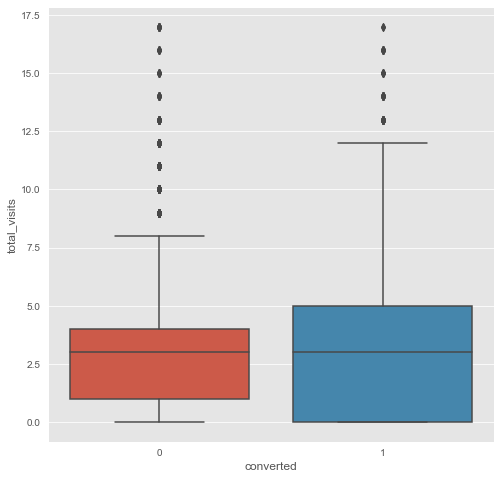

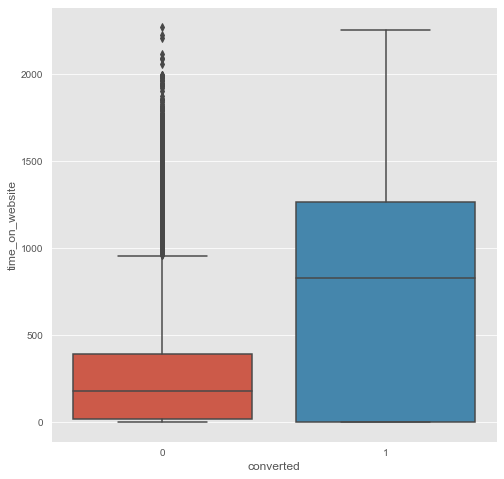

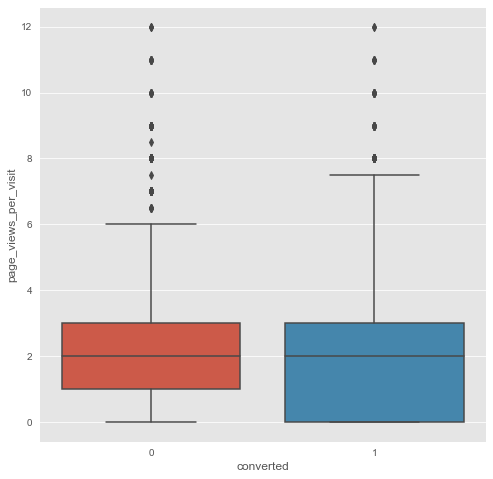

In [50]:
for i in lead[['total_visits', 'time_on_website', 'page_views_per_visit']]:
        bivariate_numerical('converted',i)
        plt.show()

### <font color = Green > Insights </font>

+ Some loyal customers seem to get converted even under 5 visits on the website with less than 4 page_views_per vist and many seem to be still exploring even after several visits. 
+ Starnge to see people spending more than 16 mins (more than 75% quantile) and not getting converted.

<Figure size 864x720 with 0 Axes>

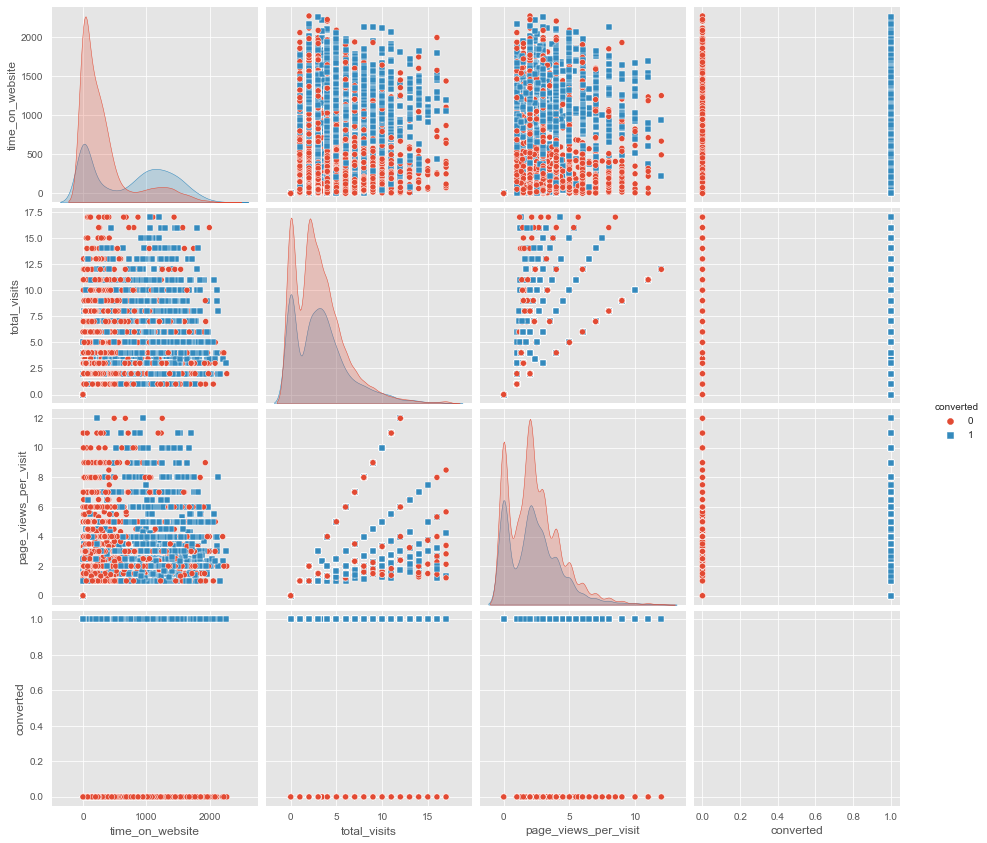

In [51]:
# Visualising correlation between Numeric Variables vs Numeric values and Conversion 
    
plt.figure(figsize=(12, 10))
g=sns.pairplot(lead[['time_on_website', 'total_visits', 'page_views_per_visit', 'converted']],
            vars = ['time_on_website', 'total_visits', 'page_views_per_visit', 'converted'], 
            hue = 'converted',  markers=['o', 's'])
g.fig.set_size_inches(14,12)
plt.show()

### <font color = Green > Insights </font>

+ total_visits and page_views_per_visit is kind of obvious being higly correlated to each other but the interseting thing to identify is even after visiting more than 4 pages there are some leads that didn't got converted means need to improve the content on the pages. 
+ time_on_website seems to be positive correlated with conversion as the data is tightly bonded to each other on both ends. 
+ We can see that potential leads spending less time on the website tend to not convert eventually. 

## 4. Prepare the data for modelling:

+ Feature Engineering / Mapping categorical variables to integers
+ Dummy variable creation
+ Test-train split and scaling
+ Feature Scaling


### Feature Engineering / Mapping categorical variables to integers

In [52]:
# Converting some binary variables (Yes/No) to 0/1
varlist =  ['do_not_email', 'do_not_call', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper',
           'digital_advertisement', 'through_recommendations', 'course_content_updates', 'supply_chain_updates', 'updates_on_dm',
           'cheque_payment', 'interview_mastering_copy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist
lead[varlist] = lead[varlist].apply(binary_map)

In [53]:
lead.head()

lead_number              lead_origin     lead_source  do_not_email  do_not_call  converted  total_visits  time_on_website  page_views_per_visit            last_activity       country           specialization source_reference occupation_status course_selection_criteria  search  magazine  newspaper_article  x_education_forums  newspaper  digital_advertisement  through_recommendations  course_content_updates  supply_chain_updates  updates_on_dm    lead_profile          city  cheque_payment  interview_mastering_copy last_notable_activity
0       660737                      API      Olark Chat             0            0          0           0.0                0                   0.0  Page Visited on Website  Not Selected             Not Selected     Not Selected        Unemployed   Better Career Prospects       0         0                  0                   0          0                      0                        0                       0                     0              0    Not Selected  Not Selected               0                         0              Modified
1       660728                      API  Organic Search             0            0          0           5.0              674                   2.5             Email Opened         India             Not Selected     Not Selected        Unemployed   Better Career Prospects       0         0                  0                   0          0                      0                        0                       0                     0              0    Not Selected  Not Selected               0                         0          Email Opened
2       660727  Landing Page Submission  Direct Traffic             0            0          1           2.0             1532                   2.0             Email Opened         India  Business Administration     Not Selected           Student   Better Career Prospects       0         0                  0                   0          0                      0                        0                       0                     0              0  Potential Lead        Mumbai               0                         1          Email Opened
3       660719  Landing Page Submission  Direct Traffic             0            0          0           1.0              305                   1.0              Unreachable         India    Media and Advertising    Word Of Mouth        Unemployed   Better Career Prospects       0         0                  0                   0          0                      0                        0                       0                     0              0    Not Selected        Mumbai               0                         0              Modified
4       660681  Landing Page Submission          Google             0            0          1           2.0             1428                   1.0        Converted to Lead         India             Not Selected            Other        Unemployed   Better Career Prospects       0         0                  0                   0          0                      0                        0                       0                     0              0    Not Selected        Mumbai               0                         0              Modified

### <font color = Green > Insights </font>

+ Now that we have performed a binary mapping for few of the categorical variables, the next step would be to create dummy variables for features with multiple levels. 
+ But before that there some categorical variables that need certain level of feature engineering so that we do not end up having too many features in our training set. Also, the unique values are more with smaller values which can be grouped in one unique value. 
    - lead_source
    - last_activity
    - specialization
    - source_reference
    - occupation_status
    - lead_profile
    - city
    - last_notable_activity
+ Also, after performinng EDA, we have analysed few columns that could turn out to be redundant in model building as they are more skewed towards 'No' with a imbalance hence will drop them too. Also, including all the post sales activity related ones. 
    - country
    - search
    - magazine
    - newspaper_article
    - x_education_forums
    - newspaper
    - digital_advertisement
    - course_content_updates
    - supply_chain_updates
    - updates_on_dm
    - cheque_payment

In [54]:
lead.lead_source.value_counts(normalize = True)*100

Google               31.545534
Direct Traffic       27.440893
Olark Chat           19.187828
Organic Search       12.215412
Reference             5.834063
Welingak Website      1.554291
Referral Sites        1.313485
Facebook              0.602014
bing                  0.065674
google                0.054729
Click2call            0.043783
Press_Release         0.021891
Social Media          0.021891
Live Chat             0.021891
youtubechannel        0.010946
testone               0.010946
Pay per Click Ads     0.010946
welearnblog_Home      0.010946
WeLearn               0.010946
blog                  0.010946
NC_EDM                0.010946
Name: lead_source, dtype: float64

In [55]:
# feature engineering for certain categorical values mentioned above

lead['lead_source'] = lead.lead_source.apply(lambda x: x if ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                                            (x=='Organic Search') | (x=='Reference')) else 'Other Sources')
lead.lead_source.value_counts(normalize = True)*100

Google            31.545534
Direct Traffic    27.440893
Olark Chat        19.187828
Organic Search    12.215412
Reference          5.834063
Other Sources      3.776270
Name: lead_source, dtype: float64

In [56]:
lead.last_activity.value_counts(normalize = True)*100

Email Opened                    38.408494
SMS Sent                        29.816112
Olark Chat Conversation         10.606392
Page Visited on Website          6.567426
Converted to Lead                4.684764
Email Bounced                    3.557356
Email Link Clicked               2.911559
Form Submitted on Website        1.247811
Unreachable                      0.996060
Unsubscribed                     0.667688
Had a Phone Conversation         0.317426
Approached upfront               0.098511
View in browser link Clicked     0.054729
Email Received                   0.021891
Email Marked Spam                0.021891
Visited Booth in Tradeshow       0.010946
Resubscribed to emails           0.010946
Name: last_activity, dtype: float64

In [57]:
# feature engineering for certain categorical values mentioned above

lead['last_activity'] = lead.last_activity.apply(lambda x: x if ((x== 'Email Opened') | (x=='SMS Sent') | (x=='Olark Chat Conversation') | 
                                                                 (x=='Page Visited on Website') | (x=='Converted to Lead')) else 'Other Activities')
lead.last_activity.value_counts(normalize = True)*100

Email Opened               38.408494
SMS Sent                   29.816112
Olark Chat Conversation    10.606392
Other Activities            9.916813
Page Visited on Website     6.567426
Converted to Lead           4.684764
Name: last_activity, dtype: float64

In [58]:
lead.specialization.value_counts(normalize = True)*100

Not Selected                         36.832312
Finance Management                   10.562609
Human Resource Management             9.139667
Marketing Management                  9.095884
Operations Management                 5.483800
Business Administration               4.334501
IT Projects Management                3.951401
Supply Chain Management               3.787215
Banking, Investment And Insurance     3.601138
Media and Advertising                 2.178196
Travel and Tourism                    2.145359
International Business                1.915499
Healthcare Management                 1.685639
Hospitality Management                1.225919
E-COMMERCE                            1.204028
Retail Management                     1.039842
Rural and Agribusiness                0.766200
E-Business                            0.612960
Services Excellence                   0.437828
Name: specialization, dtype: float64

In [59]:
# feature engineering for certain categorical values mentioned above

lead['specialization'] = lead.specialization.apply(lambda x: x if ((x== 'Not Selected') | (x=='Finance Management') | (x=='Human Resource Management') | 
                                                                   (x=='Marketing Management') | (x=='Operations Management') | 
                                                                   (x=='Business Administration')) else 'Other Specialization')
lead.specialization.value_counts(normalize = True)*100

Not Selected                 36.832312
Other Specialization         24.551226
Finance Management           10.562609
Human Resource Management     9.139667
Marketing Management          9.095884
Operations Management         5.483800
Business Administration       4.334501
Name: specialization, dtype: float64

In [60]:
lead.source_reference.value_counts(normalize = True)*100

Not Selected             78.502627
Online Search             8.690893
Word Of Mouth             3.765324
Student of SomeSchool     3.393170
Other                     1.992119
Multiple Sources          1.663748
Advertisements            0.733363
Social Media              0.722417
Email                     0.284588
SMS                       0.251751
Name: source_reference, dtype: float64

In [61]:
# feature engineering for certain categorical values mentioned above

lead['source_reference'] = lead.source_reference.apply(lambda x: x if ((x== 'Not Selected') | (x== 'Online Search') | (x=='Word Of Mouth') | 
                                                                       (x=='Student of SomeSchool')) else 'Other Source Reference')
lead.source_reference.value_counts(normalize = True)*100

Not Selected              78.502627
Online Search              8.690893
Other Source Reference     5.647986
Word Of Mouth              3.765324
Student of SomeSchool      3.393170
Name: source_reference, dtype: float64

In [62]:
lead.occupation_status.value_counts(normalize = True)*100

Unemployed              60.551664
Not Selected            29.159370
Working Professional     7.651051
Student                  2.287653
Other                    0.153240
Housewife                0.109457
Businessman              0.087566
Name: occupation_status, dtype: float64

In [63]:
# feature engineering for certain categorical values mentioned above

lead['occupation_status'] = lead.occupation_status.apply(lambda x: x if ((x== 'Unemployed') | (x=='Not Selected') | (x=='Working Professional') | 
                                                            (x=='Student')) else 'Other')
lead.occupation_status.value_counts(normalize = True)*100

Unemployed              60.551664
Not Selected            29.159370
Working Professional     7.651051
Student                  2.287653
Other                    0.350263
Name: occupation_status, dtype: float64

In [64]:
lead.lead_profile.value_counts(normalize = True)*100

Not Selected                   74.211909
Potential Lead                 17.425569
Other Leads                     5.253940
Student of SomeSchool           2.626970
Lateral Student                 0.262697
Dual Specialization Student     0.218914
Name: lead_profile, dtype: float64

In [65]:
# feature engineering for certain categorical values mentioned above

lead['lead_profile'] = lead.lead_profile.apply(lambda x: x if ((x== 'Not Selected') | (x=='Potential Lead') | (x=='Other Leads') | 
                                                            (x=='Student of SomeSchool')) else 'Other Profiles')
lead.lead_profile.value_counts(normalize = True)*100

Not Selected             74.211909
Potential Lead           17.425569
Other Leads               5.253940
Student of SomeSchool     2.626970
Other Profiles            0.481611
Name: lead_profile, dtype: float64

In [66]:
lead.city.value_counts(normalize = True)*100

Not Selected                   40.017513
Mumbai                         34.697898
Thane & Outskirts               8.066988
Other Cities                    7.410245
Other Cities of Maharashtra     4.947461
Other Metro Cities              4.060858
Tier II Cities                  0.799037
Name: city, dtype: float64

In [67]:
# feature engineering for certain categorical values mentioned above

lead['city'] = lead.city.apply(lambda x: x if ((x== 'Not Selected') | (x=='Mumbai') | (x=='Thane & Outskirts') | 
                                                (x=='Other Cities of Maharashtra')) else 'Cities Other than Maharashtra')
lead.city.value_counts(normalize = True)*100

Not Selected                     40.017513
Mumbai                           34.697898
Cities Other than Maharashtra    12.270140
Thane & Outskirts                 8.066988
Other Cities of Maharashtra       4.947461
Name: city, dtype: float64

In [68]:
lead.last_notable_activity.value_counts(normalize = True)*100

Modified                        36.996497
Email Opened                    30.647986
SMS Sent                        23.588004
Page Visited on Website          3.163310
Olark Chat Conversation          1.992119
Email Link Clicked               1.882662
Email Bounced                    0.645797
Unsubscribed                     0.514448
Unreachable                      0.350263
Had a Phone Conversation         0.142294
Email Marked Spam                0.021891
Approached upfront               0.010946
Resubscribed to emails           0.010946
View in browser link Clicked     0.010946
Form Submitted on Website        0.010946
Email Received                   0.010946
Name: last_notable_activity, dtype: float64

In [69]:
# feature engineering for certain categorical values mentioned above

lead['last_notable_activity'] = lead.last_notable_activity.apply(lambda x: x if ((x== 'Modified') | (x=='Email Opened') | (x=='SMS Sent') | 
                                                            (x=='Page Visited on Website') | (x=='Olark Chat Conversation')) else 'Other Notable Activities')
lead.last_notable_activity.value_counts(normalize = True)*100

Modified                    36.996497
Email Opened                30.647986
SMS Sent                    23.588004
Other Notable Activities     3.612084
Page Visited on Website      3.163310
Olark Chat Conversation      1.992119
Name: last_notable_activity, dtype: float64

In [70]:
#  Dropping few redundant columns post confirming EDA

lead.drop(['country', 'search', 'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement',
                 'course_content_updates', 'supply_chain_updates', 'updates_on_dm', 'cheque_payment'], axis=1, inplace = True)
lead.shape

(9136, 19)

In [71]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lead_number                9136 non-null   int64  
 1   lead_origin                9136 non-null   object 
 2   lead_source                9136 non-null   object 
 3   do_not_email               9136 non-null   int64  
 4   do_not_call                9136 non-null   int64  
 5   converted                  9136 non-null   int64  
 6   total_visits               9136 non-null   float64
 7   time_on_website            9136 non-null   int64  
 8   page_views_per_visit       9136 non-null   float64
 9   last_activity              9136 non-null   object 
 10  specialization             9136 non-null   object 
 11  source_reference           9136 non-null   object 
 12  occupation_status          9136 non-null   object 
 13  course_selection_criteria  9136 non-null   objec

### Dummy variable creation


In [72]:
lead.head()

lead_number              lead_origin     lead_source  do_not_email  do_not_call  converted  total_visits  time_on_website  page_views_per_visit            last_activity           specialization        source_reference occupation_status course_selection_criteria  through_recommendations    lead_profile          city  interview_mastering_copy last_notable_activity
0       660737                      API      Olark Chat             0            0          0           0.0                0                   0.0  Page Visited on Website             Not Selected            Not Selected        Unemployed   Better Career Prospects                        0    Not Selected  Not Selected                         0              Modified
1       660728                      API  Organic Search             0            0          0           5.0              674                   2.5             Email Opened             Not Selected            Not Selected        Unemployed   Better Career Prospects                        0    Not Selected  Not Selected                         0          Email Opened
2       660727  Landing Page Submission  Direct Traffic             0            0          1           2.0             1532                   2.0             Email Opened  Business Administration            Not Selected           Student   Better Career Prospects                        0  Potential Lead        Mumbai                         1          Email Opened
3       660719  Landing Page Submission  Direct Traffic             0            0          0           1.0              305                   1.0         Other Activities     Other Specialization           Word Of Mouth        Unemployed   Better Career Prospects                        0    Not Selected        Mumbai                         0              Modified
4       660681  Landing Page Submission          Google             0            0          1           2.0             1428                   1.0        Converted to Lead             Not Selected  Other Source Reference        Unemployed   Better Career Prospects                        0    Not Selected        Mumbai                         0              Modified

In [73]:
# Also, creating a separate dataframe of Categorical Columns for further analysis

cat_cols = list(set(lead.columns) - set(lead.describe().columns))
cat_cols

['last_notable_activity',
 'course_selection_criteria',
 'specialization',
 'last_activity',
 'lead_origin',
 'city',
 'source_reference',
 'lead_profile',
 'lead_source',
 'occupation_status']

In [74]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[['lead_origin','lead_source','last_activity','last_notable_activity']], drop_first=True)

# Adding the results to the master dataframe lead
lead = pd.concat([lead, dummy], axis=1)

In [75]:
lead.shape

(9136, 38)

In [76]:
#  Creating dummy variables for the remaining categorical variables and dropping the X_Not Selected columns individually 

# Creating dummy variables for the variable 'source_reference'
sr = pd.get_dummies(lead['source_reference'], prefix='source_reference')
# Dropping  column "source_reference_Not Selected" column
sr1 = sr.drop(['source_reference_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,sr1], axis = 1)

# Creating dummy variables for the variable 'course_selection_criteria'
csc = pd.get_dummies(lead['course_selection_criteria'], prefix='course_selection_criteria')
# Dropping  column "course_selection_criteria_Not Selected" column
csc1 = csc.drop(['course_selection_criteria_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,csc1], axis = 1)

# Creating dummy variables for the variable 'city'
c = pd.get_dummies(lead['city'], prefix='city')
# Dropping  column "city_Not Selected" column
c1 = c.drop(['city_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,c1], axis = 1)

# Creating dummy variables for the variable 'specialization'
sp = pd.get_dummies(lead['specialization'], prefix='specialization')
# Dropping  column "specialization_Not Selected" column
sp1 = sp.drop(['specialization_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,sp1], axis = 1)

# Creating dummy variables for the variable 'occupation_status'
os = pd.get_dummies(lead['occupation_status'], prefix='occupation_status')
# Dropping  column "occupation_status_Not Selected" column
os1 = os.drop(['occupation_status_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,os1], axis = 1)

# Creating dummy variables for the variable 'lead_profile'
lp = pd.get_dummies(lead['lead_profile'], prefix='lead_profile')
# Dropping  column "lead_profile_Not Selected" column
lp1 = lp.drop(['lead_profile_Not Selected'], 1)
#Adding the results to the master dataframe
lead = pd.concat([lead,lp1], axis = 1)

lead.shape

(9136, 63)

In [77]:
lead.head()

lead_number              lead_origin     lead_source  do_not_email  do_not_call  converted  total_visits  time_on_website  page_views_per_visit            last_activity           specialization        source_reference occupation_status course_selection_criteria  through_recommendations    lead_profile          city  interview_mastering_copy last_notable_activity  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  lead_origin_Lead Import  lead_origin_Quick Add Form  lead_source_Google  lead_source_Olark Chat  lead_source_Organic Search  lead_source_Other Sources  lead_source_Reference  last_activity_Email Opened  last_activity_Olark Chat Conversation  last_activity_Other Activities  last_activity_Page Visited on Website  last_activity_SMS Sent  last_notable_activity_Modified  last_notable_activity_Olark Chat Conversation  last_notable_activity_Other Notable Activities  last_notable_activity_Page Visited on Website  last_notable_activity_SMS Sent  source_reference_Online Search  source_reference_Other Source Reference  source_reference_Student of SomeSchool  source_reference_Word Of Mouth  course_selection_criteria_Better Career Prospects  course_selection_criteria_Flexibility & Convenience  course_selection_criteria_Other  city_Cities Other than Maharashtra  city_Mumbai  city_Other Cities of Maharashtra  city_Thane & Outskirts  specialization_Business Administration  specialization_Finance Management  specialization_Human Resource Management  specialization_Marketing Management  specialization_Operations Management  specialization_Other Specialization  occupation_status_Other  occupation_status_Student  occupation_status_Unemployed  occupation_status_Working Professional  lead_profile_Other Leads  lead_profile_Other Profiles  lead_profile_Potential Lead  lead_profile_Student of SomeSchool
0       660737                      API      Olark Chat             0            0          0           0.0                0                   0.0  Page Visited on Website             Not Selected            Not Selected        Unemployed   Better Career Prospects                        0    Not Selected  Not Selected                         0              Modified                                    0                          0                        0                           0                   0                       1                           0                          0                      0                           0                                      0                               0                                      1                       0                               1                                              0                                               0                                              0                               0                               0                                        0                                       0                               0                                                  1                                                  0                                  0                                   0            0                                 0                       0                                       0                                  0                                         0                                    0                                     0                                    0                        0                          0                             1                                       0                         0                            0                            0                                   0
1       660728                      API  Organic Search             0            0          0           5.0              674                   2.5             Email Opened             Not Selected            Not Selected        Unemployed   Better Career Prospects                        0    Not Selected  Not Selected              

In [78]:
# We have created dummies for the below variables, so we can drop them.

lead.drop(['source_reference',
 'lead_origin',
 'lead_profile',
 'course_selection_criteria',
 'lead_source',
 'last_activity',
 'last_notable_activity',
 'city',
 'specialization',
 'occupation_status', ], axis = 1, inplace = True)

lead.shape

(9136, 53)

### Test-train split and scaling


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
lead.head()

lead_number  do_not_email  do_not_call  converted  total_visits  time_on_website  page_views_per_visit  through_recommendations  interview_mastering_copy  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  lead_origin_Lead Import  lead_origin_Quick Add Form  lead_source_Google  lead_source_Olark Chat  lead_source_Organic Search  lead_source_Other Sources  lead_source_Reference  last_activity_Email Opened  last_activity_Olark Chat Conversation  last_activity_Other Activities  last_activity_Page Visited on Website  last_activity_SMS Sent  last_notable_activity_Modified  last_notable_activity_Olark Chat Conversation  last_notable_activity_Other Notable Activities  last_notable_activity_Page Visited on Website  last_notable_activity_SMS Sent  source_reference_Online Search  source_reference_Other Source Reference  source_reference_Student of SomeSchool  source_reference_Word Of Mouth  course_selection_criteria_Better Career Prospects  course_selection_criteria_Flexibility & Convenience  course_selection_criteria_Other  city_Cities Other than Maharashtra  city_Mumbai  city_Other Cities of Maharashtra  city_Thane & Outskirts  specialization_Business Administration  specialization_Finance Management  specialization_Human Resource Management  specialization_Marketing Management  specialization_Operations Management  specialization_Other Specialization  occupation_status_Other  occupation_status_Student  occupation_status_Unemployed  occupation_status_Working Professional  lead_profile_Other Leads  lead_profile_Other Profiles  lead_profile_Potential Lead  lead_profile_Student of SomeSchool
0       660737             0            0          0           0.0                0                   0.0                        0                         0                                    0                          0                        0                           0                   0                       1                           0                          0                      0                           0                                      0                               0                                      1                       0                               1                                              0                                               0                                              0                               0                               0                                        0                                       0                               0                                                  1                                                  0                                  0                                   0            0                                 0                       0                                       0                                  0                                         0                                    0                                     0                                    0                        0                          0                             1                                       0                         0                            0                            0                                   0
1       660728             0            0          0           5.0              674                   2.5                        0                         0                                    0                          0                        0                           0                   0                       0                           1                          0                      0                           1                                      0                               0                                      0                       0                               0                                              0                                               0                                              0                        

In [81]:
# Putting feature variables to x and dropping the redundant variable. Churn will be added to Y

X = lead.drop(['converted', 'lead_number'], axis = 1)
X.head()

do_not_email  do_not_call  total_visits  time_on_website  page_views_per_visit  through_recommendations  interview_mastering_copy  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  lead_origin_Lead Import  lead_origin_Quick Add Form  lead_source_Google  lead_source_Olark Chat  lead_source_Organic Search  lead_source_Other Sources  lead_source_Reference  last_activity_Email Opened  last_activity_Olark Chat Conversation  last_activity_Other Activities  last_activity_Page Visited on Website  last_activity_SMS Sent  last_notable_activity_Modified  last_notable_activity_Olark Chat Conversation  last_notable_activity_Other Notable Activities  last_notable_activity_Page Visited on Website  last_notable_activity_SMS Sent  source_reference_Online Search  source_reference_Other Source Reference  source_reference_Student of SomeSchool  source_reference_Word Of Mouth  course_selection_criteria_Better Career Prospects  course_selection_criteria_Flexibility & Convenience  course_selection_criteria_Other  city_Cities Other than Maharashtra  city_Mumbai  city_Other Cities of Maharashtra  city_Thane & Outskirts  specialization_Business Administration  specialization_Finance Management  specialization_Human Resource Management  specialization_Marketing Management  specialization_Operations Management  specialization_Other Specialization  occupation_status_Other  occupation_status_Student  occupation_status_Unemployed  occupation_status_Working Professional  lead_profile_Other Leads  lead_profile_Other Profiles  lead_profile_Potential Lead  lead_profile_Student of SomeSchool
0             0            0           0.0                0                   0.0                        0                         0                                    0                          0                        0                           0                   0                       1                           0                          0                      0                           0                                      0                               0                                      1                       0                               1                                              0                                               0                                              0                               0                               0                                        0                                       0                               0                                                  1                                                  0                                  0                                   0            0                                 0                       0                                       0                                  0                                         0                                    0                                     0                                    0                        0                          0                             1                                       0                         0                            0                            0                                   0
1             0            0           5.0              674                   2.5                        0                         0                                    0                          0                        0                           0                   0                       0                           1                          0                      0                           1                                      0                               0                                      0                       0                               0                                              0                                               0                                              0                               0                               0                                

In [82]:
# Adding the response / target variable to y

y = lead['converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [83]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling


In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
# Using Standardisation technique

scaler = StandardScaler()  # StandardScaler = X - mean / sigma

X_train[['total_visits',  'time_on_website', 'page_views_per_visit']] = scaler.fit_transform(X_train[['total_visits',  'time_on_website', 'page_views_per_visit']])

X_train.head()

do_not_email  do_not_call  total_visits  time_on_website  page_views_per_visit  through_recommendations  interview_mastering_copy  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  lead_origin_Lead Import  lead_origin_Quick Add Form  lead_source_Google  lead_source_Olark Chat  lead_source_Organic Search  lead_source_Other Sources  lead_source_Reference  last_activity_Email Opened  last_activity_Olark Chat Conversation  last_activity_Other Activities  last_activity_Page Visited on Website  last_activity_SMS Sent  last_notable_activity_Modified  last_notable_activity_Olark Chat Conversation  last_notable_activity_Other Notable Activities  last_notable_activity_Page Visited on Website  last_notable_activity_SMS Sent  source_reference_Online Search  source_reference_Other Source Reference  source_reference_Student of SomeSchool  source_reference_Word Of Mouth  course_selection_criteria_Better Career Prospects  course_selection_criteria_Flexibility & Convenience  course_selection_criteria_Other  city_Cities Other than Maharashtra  city_Mumbai  city_Other Cities of Maharashtra  city_Thane & Outskirts  specialization_Business Administration  specialization_Finance Management  specialization_Human Resource Management  specialization_Marketing Management  specialization_Operations Management  specialization_Other Specialization  occupation_status_Other  occupation_status_Student  occupation_status_Unemployed  occupation_status_Working Professional  lead_profile_Other Leads  lead_profile_Other Profiles  lead_profile_Potential Lead  lead_profile_Student of SomeSchool
7896             0            0     -0.403755         1.306686             -0.153306                        0                         1                                    1                          0                        0                           0                   0                       0                           0                          0                      0                           0                                      0                               0                                      1                       0                               1                                              0                                               0                                              0                               0                               0                                        0                                       0                               0                                                  1                                                  0                                  0                                   0            0                                 1                       0                                       0                                  0                                         1                                    0                                     0                                    0                        0                          0                             1                                       0                         0                            0                            0                                   0
8701             0            0     -0.749397         0.200127             -0.664890                        0                         1                                    1                          0                        0                           0                   0                       0                           0                          0                      0                           0                                      0                               0                                      0                       0                               1                                              0                                               0                                              0                               0                               0                          

In [86]:
# Looking at the churn rate ratio

conversion = (sum(lead['converted'])/len(lead['converted'].index))*100
conversion

38.49605954465849

### <font color = Green > Insights </font>

We have almost 38% conversion rate, which is a bit imbalance

**Conversion Rate and Class Imbalance**

+ Another thing to note here was the Conversion Rate. As we see the data has almost 38% conversion rate. Checking the conversion rate is important since we usually want your data to have a balance between the 0s and 1s. 

+ The reason for having a balance is simple. Let’s do a simple thought experiment - if you had a data with, say, 95% not-churn (0) and just 5% churn (1), then even if you predict everything as 0, you would still get a model which is 95% accurate (though it is, of course, a bad model). This problem is called class-imbalance. 

+ Fortunately, in this case, we have about 38% conversion rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset. Let's move to model buidling

## 5. Model Building:

+ Feature elimination based on correlations
+ Feature selection using RFE
+ Running our First Model
+ Manual feature elimination (using p-values and VIFs)
+ Creating Predictions


### Feature elimination based on correlations

In [87]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

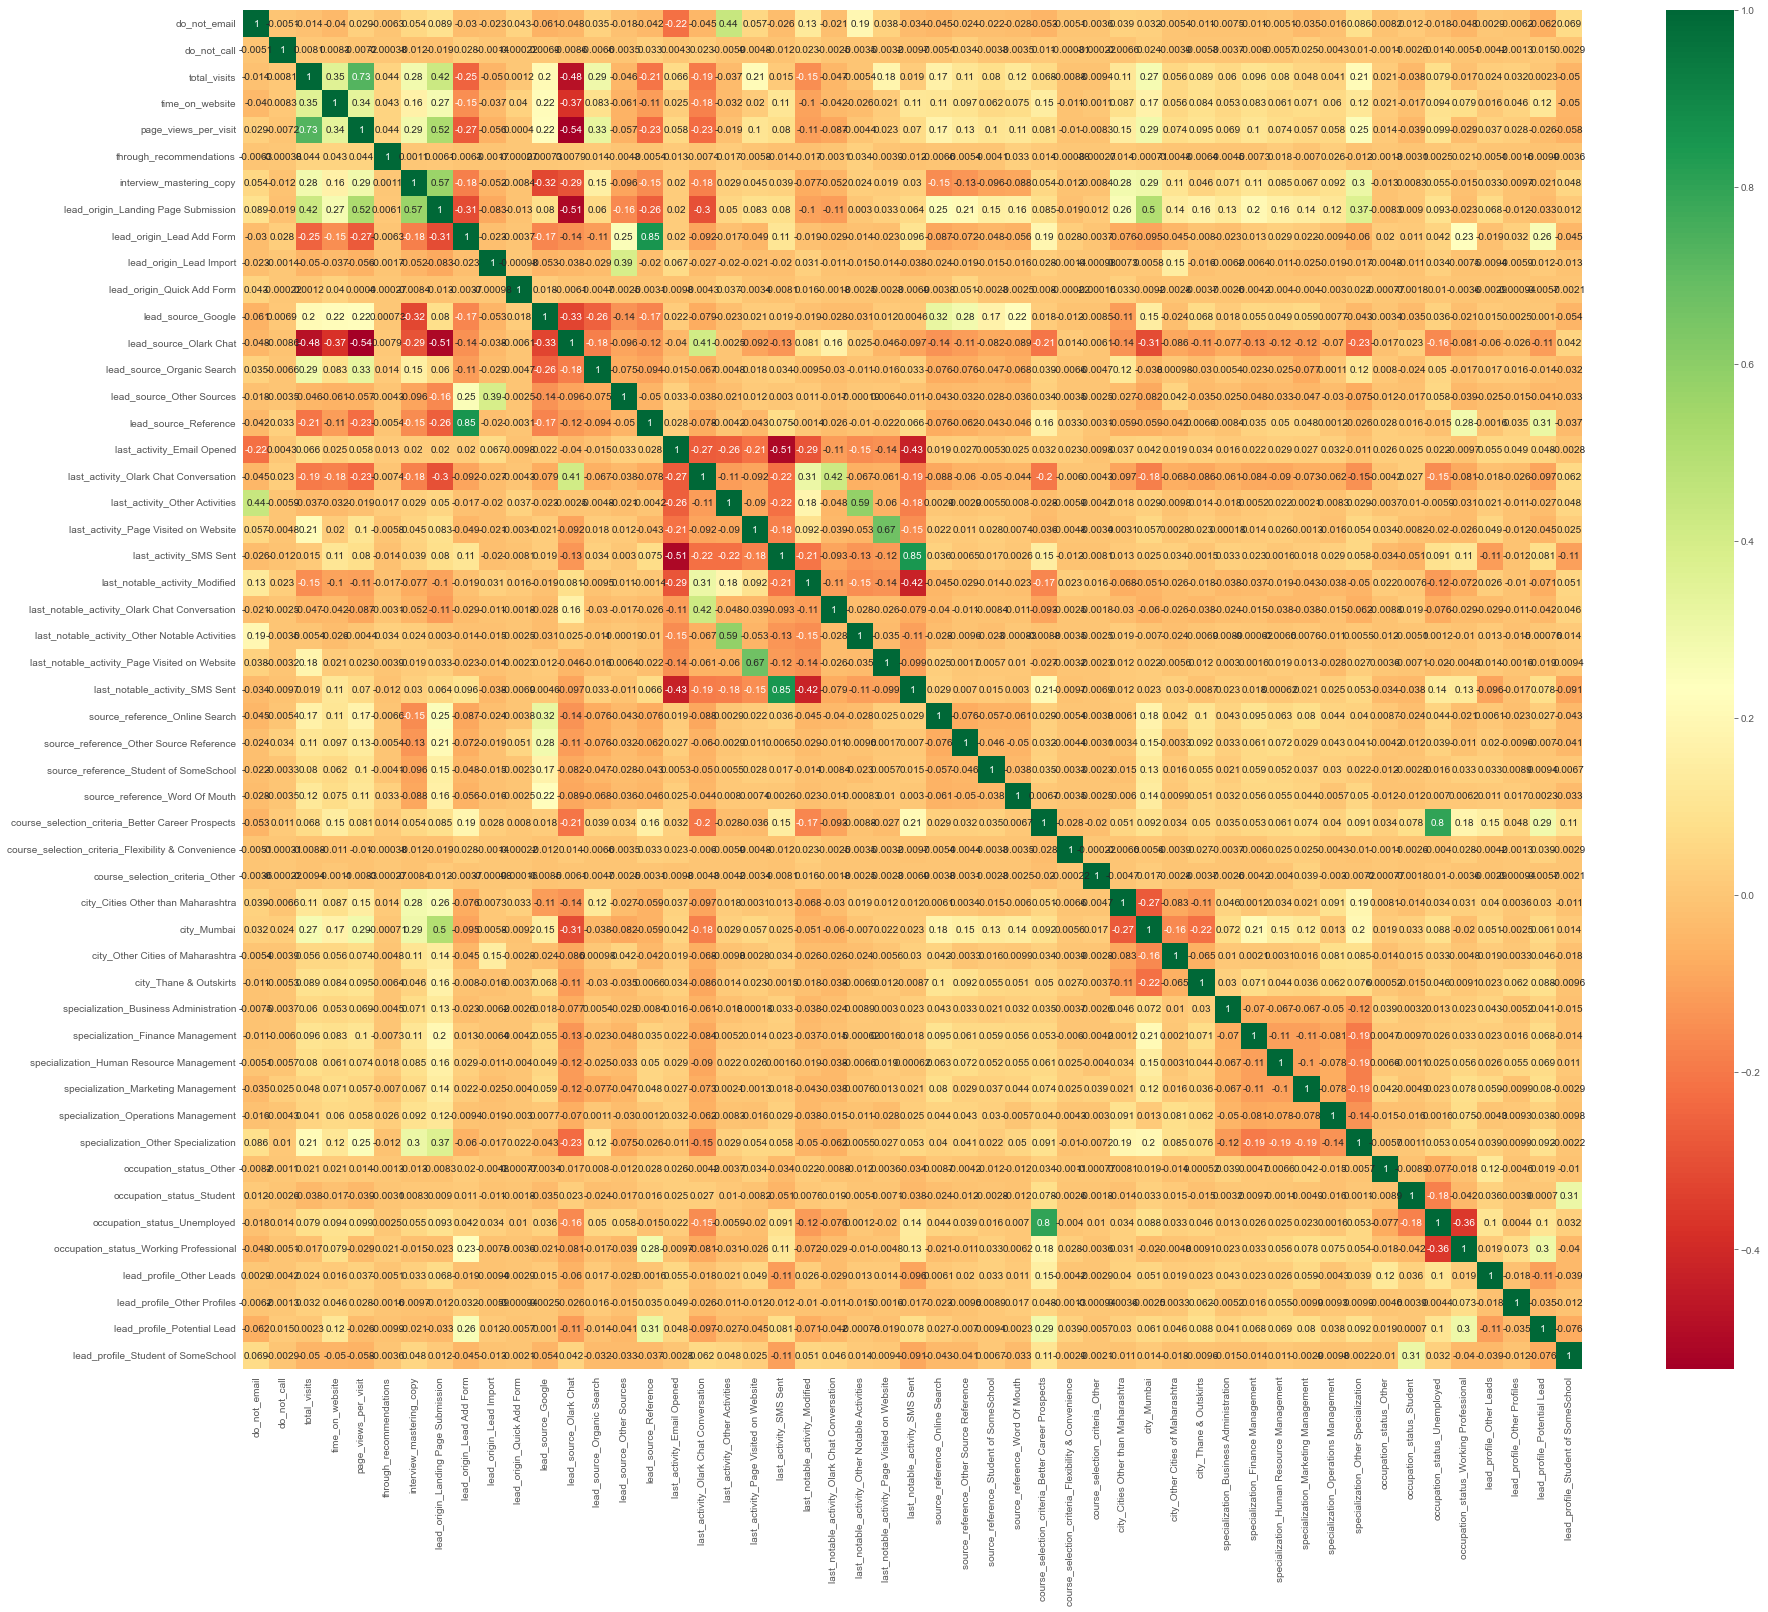

In [88]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,25))     
sns.heatmap(X_train.corr(), cmap="RdYlGn", annot = True)
plt.show()

### <font color = Green > Insights </font>

+ If you check the highlighted portion, you’ll see that there are high correlations among the pairs of dummy variables which were created for the same column. For example, ‘lead_source_Olark Chat’ has a high correlation with many other features. So it is better than we drop one of these variables from each pair as they won’t add much value to the model.
+ Another features are 'last_activity_Email Opened', 'last_notable_activity_Modified', 'occupation_status_Unemployed', 'interview_mastering_copy' are creating multicolinearity. 

But there are a lot of variabled hence it is difficult to select and drop all at this stage. We'll analyse it after RFE and decide to drop them if required. 

In [89]:
#### Dropping highly correlated dummy variables

X_test = X_test.drop(['lead_source_Olark Chat', 'last_activity_Email Opened', 'last_notable_activity_Modified', 'occupation_status_Unemployed', 'interview_mastering_copy' ], 1)
X_train = X_train.drop(['lead_source_Olark Chat', 'last_activity_Email Opened', 'last_notable_activity_Modified', 'occupation_status_Unemployed', 'interview_mastering_copy'], 1)

#### Checking the Correlation Matrix again

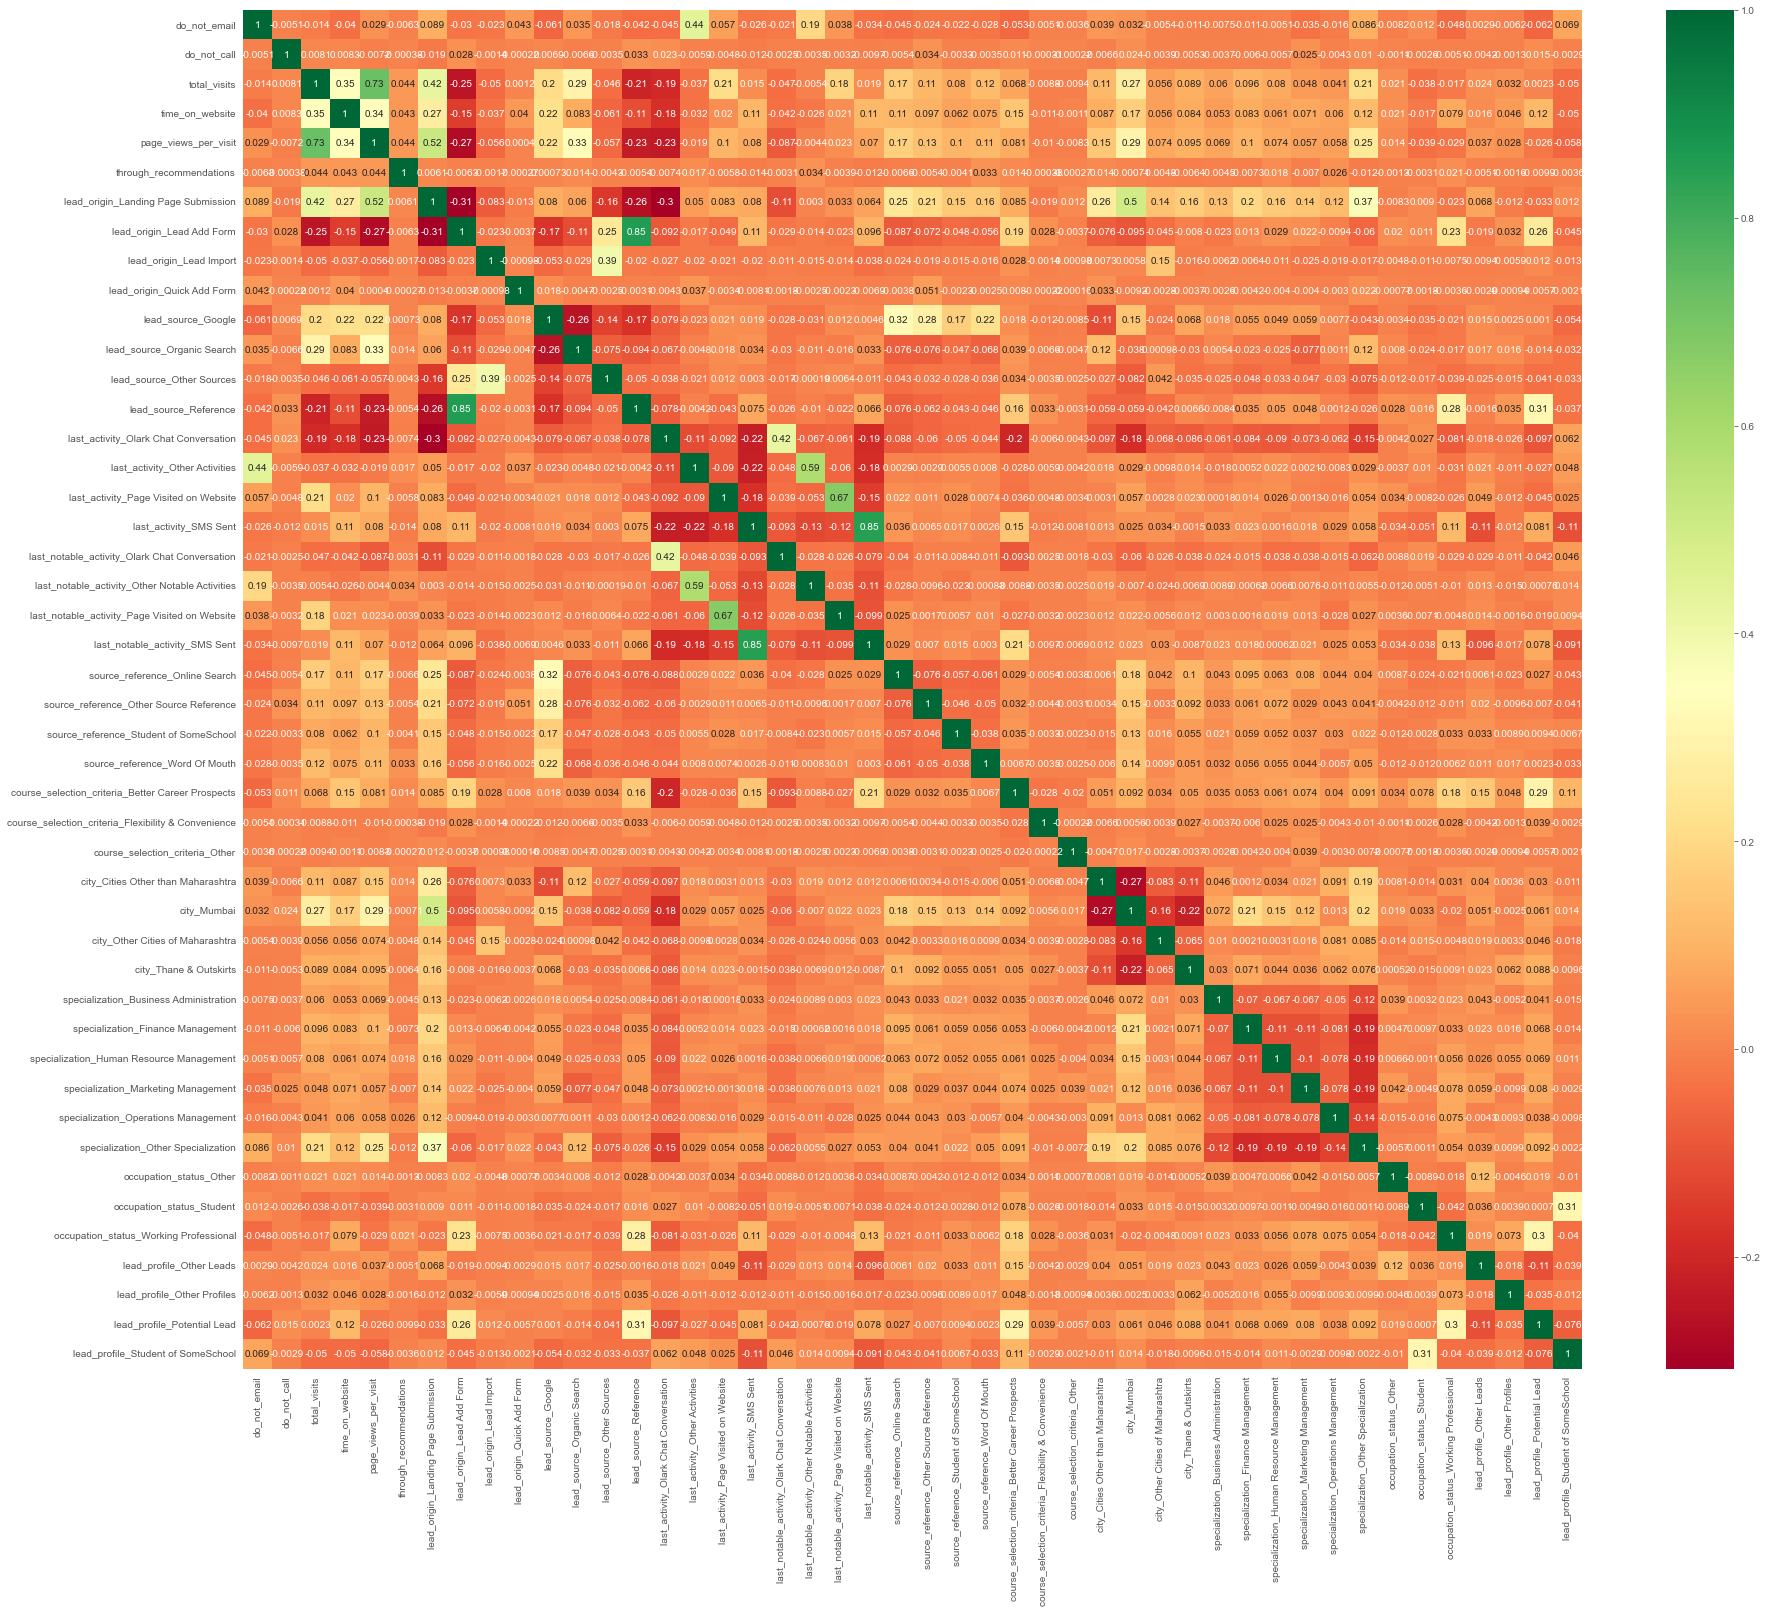

In [90]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,25))     
sns.heatmap(X_train.corr(), cmap="RdYlGn", annot = True)
plt.show()

### Running our First Training Model

In [91]:
# Gives you all statistics summary

import statsmodels.api as sm 

In [92]:
# Logistic regression Model 1

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           46
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2433.5
Date:                Tue, 18 Jan 2022   Deviance:                       4867.0
Time:                        01:11:05   Pearson chi2:                 6.46e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -1.5940      0.119    -13.393      0.000      -1.827      -1.361
do_not_email                                           -1.1668      0.187     -6.246      0.000      -1.533      -0.801
do_not_call                                            23.3582   9.05e+04      0.000      1.000   -1.77e+05    1.77e+05
total_visits                                            0.2205      0.054      4.101      0.000       0.115       0.326
time_on_website                                         0.9718      0.040     24.150      0.000       0.893       1.051
page_views_per_visit                                   -0.3055      0.059     -5.168      0.000      -0.421      -0.190
through_recommendations                                23.6666   6.73e+04      0.000      1.000   -1.32e+05    1.32e+05
lead_origin_Landing Page Submission                    -1.3121      0.150     -8.747      0.000      -1.606      -1.018
lead_origin_Lead Add Form                               3.8934      0.449      8.678      0.000       3.014       4.773
lead_origin_Lead Import                                -0.4267      0.538     -0.793      0.428      -1.482       0.628
lead_origin_Quick Add Form                             23.4912   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
lead_source_Google                                     -0.4164      0.107     -3.874      0.000      -0.627      -0.206
lead_source_Organic Search                             -0.2519      0.128     -1.973      0.048      -0.502      -0.002
lead_source_Other Sources                              -0.4160      0.295     -1.412      0.158      -0.993       0.162
lead_source_Reference                                  -2.3461      0.491     -4.782      0.000      -3.308      -1.384
last_activity_Olark Chat Conversation                  -1.4420      0.212     -6.814      0.000      -1.857      -1.027
last_activity_Other Activities                         -0.6227      0.195     -3.191      0.001      -1.005      -0.240
last_activity_Page Visited on Website                  -0.4439      0.220     -2.019      0.044      -0.875      -0.013
last_activity_SMS Sent                                  0.5635      0.149      3.770      0.000       0.271       0.856
last_notable_activity_Olark Chat Conversation           0.6041      0.373      1.619      0.105      -0.127       1.335
last_notable_activity_Other Notable Activities          1.1373      0.258      4.408      0.000       0.632       1.643
last_notable_activity_Page Visited on Website           0.0429      0.306      0.140      0.888      -0.557       0.643
last_notable_activity_SMS Sent                          1.0393      0.155      6.70

### <font color = Green > Insights </font>

+ In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

+ We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

+ After learning the coefficients of each variable, the model also produces a ‘p-value’ of each coefficient. 

**“The null hypothesis is that the coefficient is _Zero_. If the p-value is small, you can say that the coefficient is significant and hence the null hypothesis  __can be rejected__.”**

### Feature selection using RFE 

In [93]:
# Statsmodel does not work with RFE hence we import scikit learn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [94]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25, step=1)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True])

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('do_not_call', True, 1),
 ('total_visits', False, 13),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 11),
 ('through_recommendations', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', True, 1),
 ('lead_origin_Quick Add Form', False, 14),
 ('lead_source_Google', False, 2),
 ('lead_source_Organic Search', False, 12),
 ('lead_source_Other Sources', False, 15),
 ('lead_source_Reference', True, 1),
 ('last_activity_Olark Chat Conversation', True, 1),
 ('last_activity_Other Activities', True, 1),
 ('last_activity_Page Visited on Website', False, 4),
 ('last_activity_SMS Sent', True, 1),
 ('last_notable_activity_Olark Chat Conversation', True, 1),
 ('last_notable_activity_Other Notable Activities', True, 1),
 ('last_notable_activity_Page Visited on Website', False, 22),
 ('last_notable_activity_SMS Sent', True, 1),
 ('source_reference_Online Search', True, 1),
 ('s

In [97]:
# Columns that are included
col = X_train.columns[rfe.support_]
col

Index(['do_not_email', 'do_not_call', 'time_on_website', 'through_recommendations', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_origin_Lead Import', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Other Source Reference', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Other Profiles', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [98]:
# Columns that are excluded
X_train.columns[~rfe.support_]

Index(['total_visits', 'page_views_per_visit', 'lead_origin_Quick Add Form', 'lead_source_Google', 'lead_source_Organic Search', 'lead_source_Other Sources', 'last_activity_Page Visited on Website', 'last_notable_activity_Page Visited on Website', 'course_selection_criteria_Flexibility & Convenience', 'course_selection_criteria_Other', 'city_Cities Other than Maharashtra', 'city_Mumbai', 'city_Other Cities of Maharashtra', 'city_Thane & Outskirts', 'specialization_Business Administration', 'specialization_Finance Management', 'specialization_Human Resource Management', 'specialization_Marketing Management', 'specialization_Operations Management', 'specialization_Other Specialization', 'lead_profile_Other Leads'], dtype='object')

##### Assessing the model with StatsModels

In [99]:
# Logistic regression Model 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6369
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.2
Date:                Tue, 18 Jan 2022   Deviance:                       4952.4
Time:                        01:11:07   Pearson chi2:                 6.53e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.7004      0.095    -17.899      0.000      -1.887      -1.514
do_not_email                                         -1.2228      0.184     -6.659      0.000      -1.583      -0.863
do_not_call                                          23.8163   9.21e+04      0.000      1.000    -1.8e+05     1.8e+05
time_on_website                                       0.9284      0.038     24.630      0.000       0.854       1.002
through_recommendations                              23.3682   7.06e+04      0.000      1.000   -1.38e+05    1.38e+05
lead_origin_Landing Page Submission                  -0.9259      0.088    -10.542      0.000      -1.098      -0.754
lead_origin_Lead Add Form                             3.6720      0.385      9.541      0.000       2.918       4.426
lead_origin_Lead Import                              -0.3741      0.436     -0.858      0.391      -1.229       0.480
lead_source_Reference                                -1.7812      0.425     -4.187      0.000      -2.615      -0.947
last_activity_Olark Chat Conversation                -1.3622      0.209     -6.525      0.000      -1.771      -0.953
last_activity_Other Activities                       -0.5356      0.191     -2.804      0.005      -0.910      -0.161
last_activity_SMS Sent                                0.5248      0.145      3.613      0.000       0.240       0.810
last_notable_activity_Olark Chat Conversation         0.7166      0.365      1.964      0.050       0.001       1.432
last_notable_activity_Other Notable Activities        1.1387      0.255      4.472      0.000       0.640       1.638
last_notable_activity_SMS Sent                        1.0546      0.153      6.907      0.000       0.755       1.354
source_reference_Online Search                        0.2094      0.126      1.660      0.097      -0.038       0.457
source_reference_Other Source Reference               0.1425      0.150      0.953      0.341      -0.151       0.436
source_reference_Student of SomeSchool                0.3153      0.194      1.625      0.104      -0.065       0.696
source_reference_Word Of Mouth                        0.5881      0.176      3.337      0.001       0.243       0.934
course_selection_criteria_Better Career Prospects     0.8689      0.093      9.294      0.000       0.686       1.052
occupation_status_Other                               1.1802      0.502      2.351      0.019       0.196       2.164
occupation_status_Student                             0.8900      0.273      3.266      0.001       0.356       1.424
occupation_status_Working Professional                2.1060      0.185     11.385      0.000       1.743       2.469
lead_profile_Ot

### <font color = Green > Insights </font>

+ There are a few variables with high P-values. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. One such feature to start with is do_not_call. Let's drop this feature and check the model again. 

In [100]:
# Droping feature with high P-value

col = col.drop('do_not_call', 1)
col

Index(['do_not_email', 'time_on_website', 'through_recommendations', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_origin_Lead Import', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Other Source Reference', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Other Profiles', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [101]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.9
Date:                Tue, 18 Jan 2022   Deviance:                       4953.9
Time:                        01:11:07   Pearson chi2:                 6.54e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.7009      0.095    -17.907      0.000      -1.887      -1.515
do_not_email                                         -1.2231      0.184     -6.658      0.000      -1.583      -0.863
time_on_website                                       0.9289      0.038     24.650      0.000       0.855       1.003
through_recommendations                              22.3678   4.28e+04      0.001      1.000   -8.39e+04     8.4e+04
lead_origin_Landing Page Submission                  -0.9270      0.088    -10.561      0.000      -1.099      -0.755
lead_origin_Lead Add Form                             3.6727      0.385      9.542      0.000       2.918       4.427
lead_origin_Lead Import                              -0.3740      0.436     -0.858      0.391      -1.229       0.481
lead_source_Reference                                -1.7682      0.425     -4.156      0.000      -2.602      -0.934
last_activity_Olark Chat Conversation                -1.3479      0.207     -6.513      0.000      -1.753      -0.942
last_activity_Other Activities                       -0.5368      0.191     -2.808      0.005      -0.911      -0.162
last_activity_SMS Sent                                0.5243      0.145      3.608      0.000       0.239       0.809
last_notable_activity_Olark Chat Conversation         0.7020      0.364      1.929      0.054      -0.011       1.415
last_notable_activity_Other Notable Activities        1.1398      0.255      4.475      0.000       0.641       1.639
last_notable_activity_SMS Sent                        1.0550      0.153      6.907      0.000       0.756       1.354
source_reference_Online Search                        0.2101      0.126      1.665      0.096      -0.037       0.457
source_reference_Other Source Reference               0.1482      0.149      0.993      0.321      -0.144       0.441
source_reference_Student of SomeSchool                0.3162      0.194      1.629      0.103      -0.064       0.697
source_reference_Word Of Mouth                        0.5889      0.176      3.341      0.001       0.243       0.934
course_selection_criteria_Better Career Prospects     0.8694      0.093      9.301      0.000       0.686       1.053
occupation_status_Other                               1.1775      0.502      2.345      0.019       0.193       2.162
occupation_status_Student                             0.8884      0.273      3.259      0.001       0.354       1.423
occupation_status_Working Professional                2.1045      0.185     11.375      0.000       1.742       2.467
lead_profile_Other Profiles                          23.3572   1.18e+04      0.002      0.998    -2.3e+04    2.31e+04
lead_profile_Po

### <font color = Green > Insights </font>

+ Let's drop through_recommendations due to high P-value

In [102]:
# Droping feature with high P-value

col = col.drop('through_recommendations', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_origin_Lead Import', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Other Source Reference', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Other Profiles', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [103]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.8
Date:                Tue, 18 Jan 2022   Deviance:                       4955.5
Time:                        01:11:07   Pearson chi2:                 6.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.7009      0.095    -17.905      0.000      -1.887      -1.515
do_not_email                                         -1.2239      0.184     -6.662      0.000      -1.584      -0.864
time_on_website                                       0.9304      0.038     24.703      0.000       0.857       1.004
lead_origin_Landing Page Submission                  -0.9279      0.088    -10.573      0.000      -1.100      -0.756
lead_origin_Lead Add Form                             3.6728      0.385      9.542      0.000       2.918       4.427
lead_origin_Lead Import                              -0.3746      0.436     -0.859      0.390      -1.229       0.480
lead_source_Reference                                -1.7682      0.425     -4.156      0.000      -2.602      -0.934
last_activity_Olark Chat Conversation                -1.3488      0.207     -6.517      0.000      -1.755      -0.943
last_activity_Other Activities                       -0.5389      0.191     -2.819      0.005      -0.914      -0.164
last_activity_SMS Sent                                0.5232      0.145      3.600      0.000       0.238       0.808
last_notable_activity_Olark Chat Conversation         0.7012      0.364      1.926      0.054      -0.012       1.415
last_notable_activity_Other Notable Activities        1.1430      0.255      4.489      0.000       0.644       1.642
last_notable_activity_SMS Sent                        1.0548      0.153      6.904      0.000       0.755       1.354
source_reference_Online Search                        0.2096      0.126      1.661      0.097      -0.038       0.457
source_reference_Other Source Reference               0.1474      0.149      0.988      0.323      -0.145       0.440
source_reference_Student of SomeSchool                0.3156      0.194      1.626      0.104      -0.065       0.696
source_reference_Word Of Mouth                        0.6003      0.176      3.416      0.001       0.256       0.945
course_selection_criteria_Better Career Prospects     0.8712      0.093      9.321      0.000       0.688       1.054
occupation_status_Other                               1.1764      0.502      2.342      0.019       0.192       2.161
occupation_status_Student                             0.8875      0.273      3.255      0.001       0.353       1.422
occupation_status_Working Professional                2.1056      0.185     11.385      0.000       1.743       2.468
lead_profile_Other Profiles                          23.3548   1.18e+04      0.002      0.998    -2.3e+04    2.31e+04
lead_profile_Potential Lead                           1.6531      0.101     16.357      0.000       1.455       1.851
lead_profile_St

### <font color = Green > Insights </font>

+ Let's drop lead_profile_Other Profiles due to high P-value

In [104]:
# Droping feature with high P-value

col = col.drop('lead_profile_Other Profiles', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_origin_Lead Import', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Other Source Reference', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [105]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6372
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.1
Date:                Tue, 18 Jan 2022   Deviance:                       4996.1
Time:                        01:11:07   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6936      0.095    -17.853      0.000      -1.880      -1.508
do_not_email                                         -1.2079      0.182     -6.650      0.000      -1.564      -0.852
time_on_website                                       0.9381      0.038     24.970      0.000       0.864       1.012
lead_origin_Landing Page Submission                  -0.9258      0.087    -10.612      0.000      -1.097      -0.755
lead_origin_Lead Add Form                             3.6679      0.384      9.548      0.000       2.915       4.421
lead_origin_Lead Import                              -0.3917      0.436     -0.898      0.369      -1.247       0.463
lead_source_Reference                                -1.7244      0.425     -4.059      0.000      -2.557      -0.892
last_activity_Olark Chat Conversation                -1.3672      0.207     -6.604      0.000      -1.773      -0.961
last_activity_Other Activities                       -0.5337      0.189     -2.826      0.005      -0.904      -0.164
last_activity_SMS Sent                                0.5096      0.145      3.517      0.000       0.226       0.794
last_notable_activity_Olark Chat Conversation         0.6959      0.365      1.906      0.057      -0.020       1.412
last_notable_activity_Other Notable Activities        1.1096      0.253      4.385      0.000       0.614       1.606
last_notable_activity_SMS Sent                        1.0467      0.152      6.865      0.000       0.748       1.346
source_reference_Online Search                        0.1889      0.126      1.499      0.134      -0.058       0.436
source_reference_Other Source Reference               0.1303      0.149      0.876      0.381      -0.161       0.422
source_reference_Student of SomeSchool                0.3288      0.193      1.704      0.088      -0.049       0.707
source_reference_Word Of Mouth                        0.6064      0.174      3.478      0.001       0.265       0.948
course_selection_criteria_Better Career Prospects     0.8972      0.093      9.619      0.000       0.714       1.080
occupation_status_Other                               1.1467      0.503      2.282      0.022       0.162       2.132
occupation_status_Student                             0.9184      0.271      3.388      0.001       0.387       1.450
occupation_status_Working Professional                2.1354      0.184     11.627      0.000       1.775       2.495
lead_profile_Potential Lead                           1.6220      0.101     16.078      0.000       1.424       1.820
lead_profile_Student of SomeSchool                   -2.0914      0.434     -4.823      0.000      -2.941      -1.242
===============

### <font color = Green > Insights </font>

+ Let's drop source_reference_Other Source Reference due to high P-value

In [106]:
# Droping feature with high P-value

col = col.drop('source_reference_Other Source Reference', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_origin_Lead Import', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [107]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6373
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.5
Date:                Tue, 18 Jan 2022   Deviance:                       4996.9
Time:                        01:11:07   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6915      0.095    -17.839      0.000      -1.877      -1.506
do_not_email                                         -1.2136      0.181     -6.692      0.000      -1.569      -0.858
time_on_website                                       0.9399      0.038     25.049      0.000       0.866       1.013
lead_origin_Landing Page Submission                  -0.9082      0.085    -10.710      0.000      -1.074      -0.742
lead_origin_Lead Add Form                             3.6674      0.384      9.546      0.000       2.914       4.420
lead_origin_Lead Import                              -0.3941      0.436     -0.903      0.367      -1.249       0.461
lead_source_Reference                                -1.7254      0.425     -4.062      0.000      -2.558      -0.893
last_activity_Olark Chat Conversation                -1.3682      0.207     -6.608      0.000      -1.774      -0.962
last_activity_Other Activities                       -0.5295      0.189     -2.805      0.005      -0.899      -0.160
last_activity_SMS Sent                                0.5076      0.145      3.503      0.000       0.224       0.792
last_notable_activity_Olark Chat Conversation         0.6962      0.365      1.905      0.057      -0.020       1.412
last_notable_activity_Other Notable Activities        1.1040      0.253      4.366      0.000       0.608       1.600
last_notable_activity_SMS Sent                        1.0472      0.152      6.868      0.000       0.748       1.346
source_reference_Online Search                        0.1691      0.124      1.364      0.173      -0.074       0.412
source_reference_Student of SomeSchool                0.3092      0.192      1.613      0.107      -0.066       0.685
source_reference_Word Of Mouth                        0.5869      0.173      3.393      0.001       0.248       0.926
course_selection_criteria_Better Career Prospects     0.8986      0.093      9.635      0.000       0.716       1.081
occupation_status_Other                               1.1433      0.503      2.275      0.023       0.158       2.129
occupation_status_Student                             0.9157      0.271      3.382      0.001       0.385       1.446
occupation_status_Working Professional                2.1370      0.184     11.635      0.000       1.777       2.497
lead_profile_Potential Lead                           1.6216      0.101     16.077      0.000       1.424       1.819
lead_profile_Student of SomeSchool                   -2.1011      0.433     -4.850      0.000      -2.950      -1.252
=====================================================================================================================
"""

### <font color = Green > Insights </font>

+ Let's drop lead_origin_Lead Import due to high P-value

In [108]:
# Droping feature with high P-value

col = col.drop('lead_origin_Lead Import', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Online Search', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [109]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 7

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.9
Date:                Tue, 18 Jan 2022   Deviance:                       4997.8
Time:                        01:11:07   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6980      0.095    -17.944      0.000      -1.883      -1.513
do_not_email                                         -1.2128      0.181     -6.686      0.000      -1.568      -0.857
time_on_website                                       0.9409      0.038     25.077      0.000       0.867       1.014
lead_origin_Landing Page Submission                  -0.9008      0.084    -10.670      0.000      -1.066      -0.735
lead_origin_Lead Add Form                             3.6770      0.384      9.575      0.000       2.924       4.430
lead_source_Reference                                -1.7250      0.425     -4.061      0.000      -2.558      -0.892
last_activity_Olark Chat Conversation                -1.3598      0.207     -6.574      0.000      -1.765      -0.954
last_activity_Other Activities                       -0.5274      0.189     -2.792      0.005      -0.898      -0.157
last_activity_SMS Sent                                0.5046      0.145      3.488      0.000       0.221       0.788
last_notable_activity_Olark Chat Conversation         0.6946      0.365      1.901      0.057      -0.022       1.411
last_notable_activity_Other Notable Activities        1.1065      0.253      4.374      0.000       0.611       1.602
last_notable_activity_SMS Sent                        1.0536      0.152      6.924      0.000       0.755       1.352
source_reference_Online Search                        0.1699      0.124      1.371      0.171      -0.073       0.413
source_reference_Student of SomeSchool                0.3102      0.192      1.619      0.105      -0.065       0.686
source_reference_Word Of Mouth                        0.5876      0.173      3.397      0.001       0.249       0.927
course_selection_criteria_Better Career Prospects     0.8954      0.093      9.607      0.000       0.713       1.078
occupation_status_Other                               1.1468      0.503      2.282      0.023       0.162       2.132
occupation_status_Student                             0.9181      0.271      3.391      0.001       0.387       1.449
occupation_status_Working Professional                2.1370      0.184     11.631      0.000       1.777       2.497
lead_profile_Potential Lead                           1.6195      0.101     16.065      0.000       1.422       1.817
lead_profile_Student of SomeSchool                   -2.0980      0.433     -4.842      0.000      -2.947      -1.249
=====================================================================================================================
"""

### <font color = Green > Insights </font>

+ Let's drop source_reference_Online Search due to high P-value

In [110]:
# Droping feature with high P-value

col = col.drop('source_reference_Online Search', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Student of SomeSchool', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [111]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 8

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.8
Date:                Tue, 18 Jan 2022   Deviance:                       4999.6
Time:                        01:11:08   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6941      0.095    -17.919      0.000      -1.879      -1.509
do_not_email                                         -1.2265      0.181     -6.777      0.000      -1.581      -0.872
time_on_website                                       0.9425      0.038     25.129      0.000       0.869       1.016
lead_origin_Landing Page Submission                  -0.8731      0.082    -10.672      0.000      -1.033      -0.713
lead_origin_Lead Add Form                             3.6767      0.384      9.574      0.000       2.924       4.429
lead_source_Reference                                -1.7285      0.425     -4.069      0.000      -2.561      -0.896
last_activity_Olark Chat Conversation                -1.3615      0.207     -6.583      0.000      -1.767      -0.956
last_activity_Other Activities                       -0.5137      0.189     -2.723      0.006      -0.883      -0.144
last_activity_SMS Sent                                0.5035      0.145      3.481      0.000       0.220       0.787
last_notable_activity_Olark Chat Conversation         0.6949      0.365      1.902      0.057      -0.021       1.411
last_notable_activity_Other Notable Activities        1.0897      0.253      4.314      0.000       0.595       1.585
last_notable_activity_SMS Sent                        1.0560      0.152      6.941      0.000       0.758       1.354
source_reference_Student of SomeSchool                0.2797      0.190      1.470      0.142      -0.093       0.653
source_reference_Word Of Mouth                        0.5568      0.172      3.246      0.001       0.221       0.893
course_selection_criteria_Better Career Prospects     0.8947      0.093      9.602      0.000       0.712       1.077
occupation_status_Other                               1.1487      0.500      2.298      0.022       0.169       2.128
occupation_status_Student                             0.9092      0.270      3.365      0.001       0.380       1.439
occupation_status_Working Professional                2.1330      0.184     11.608      0.000       1.773       2.493
lead_profile_Potential Lead                           1.6243      0.101     16.118      0.000       1.427       1.822
lead_profile_Student of SomeSchool                   -2.1078      0.433     -4.871      0.000      -2.956      -1.260
=====================================================================================================================
"""

### <font color = Green > Insights </font>

+ Let's drop source_reference_Student of SomeSchool due to high P-value

In [112]:
# Droping feature with high P-value

col = col.drop('source_reference_Student of SomeSchool', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Olark Chat Conversation', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [113]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 9

X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6376
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2500.9
Date:                Tue, 18 Jan 2022   Deviance:                       5001.8
Time:                        01:11:08   Pearson chi2:                 6.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6929      0.095    -17.913      0.000      -1.878      -1.508
do_not_email                                         -1.2328      0.181     -6.817      0.000      -1.587      -0.878
time_on_website                                       0.9427      0.037     25.142      0.000       0.869       1.016
lead_origin_Landing Page Submission                  -0.8572      0.081    -10.583      0.000      -1.016      -0.698
lead_origin_Lead Add Form                             3.6762      0.384      9.574      0.000       2.924       4.429
lead_source_Reference                                -1.7306      0.425     -4.074      0.000      -2.563      -0.898
last_activity_Olark Chat Conversation                -1.3635      0.207     -6.593      0.000      -1.769      -0.958
last_activity_Other Activities                       -0.5094      0.189     -2.702      0.007      -0.879      -0.140
last_activity_SMS Sent                                0.5052      0.145      3.493      0.000       0.222       0.789
last_notable_activity_Olark Chat Conversation         0.7004      0.365      1.916      0.055      -0.016       1.417
last_notable_activity_Other Notable Activities        1.0819      0.252      4.287      0.000       0.587       1.577
last_notable_activity_SMS Sent                        1.0529      0.152      6.921      0.000       0.755       1.351
source_reference_Word Of Mouth                        0.5396      0.171      3.153      0.002       0.204       0.875
course_selection_criteria_Better Career Prospects     0.8967      0.093      9.626      0.000       0.714       1.079
occupation_status_Other                               1.1375      0.499      2.277      0.023       0.159       2.116
occupation_status_Student                             0.9073      0.270      3.359      0.001       0.378       1.437
occupation_status_Working Professional                2.1421      0.184     11.668      0.000       1.782       2.502
lead_profile_Potential Lead                           1.6226      0.101     16.111      0.000       1.425       1.820
lead_profile_Student of SomeSchool                   -2.1037      0.433     -4.861      0.000      -2.952      -1.256
=====================================================================================================================
"""

### <font color = Green > Insights </font>

+ Let's drop last_notable_activity_Olark Chat Conversation due to high P-value

In [114]:
# Droping feature with high P-value

col = col.drop('last_notable_activity_Olark Chat Conversation', 1)
col

Index(['do_not_email', 'time_on_website', 'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form', 'lead_source_Reference', 'last_activity_Olark Chat Conversation', 'last_activity_Other Activities', 'last_activity_SMS Sent', 'last_notable_activity_Other Notable Activities', 'last_notable_activity_SMS Sent', 'source_reference_Word Of Mouth', 'course_selection_criteria_Better Career Prospects', 'occupation_status_Other', 'occupation_status_Student', 'occupation_status_Working Professional', 'lead_profile_Potential Lead', 'lead_profile_Student of SomeSchool'], dtype='object')

In [115]:
# Let's re-run the model using the selected variables

# Logistic Regression Model 10

X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.6
Date:                Tue, 18 Jan 2022   Deviance:                       5005.3
Time:                        01:11:08   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6930      0.095    -17.914      0.000      -1.878      -1.508
do_not_email                                         -1.2312      0.181     -6.807      0.000      -1.586      -0.877
time_on_website                                       0.9465      0.037     25.244      0.000       0.873       1.020
lead_origin_Landing Page Submission                  -0.8575      0.081    -10.581      0.000      -1.016      -0.699
lead_origin_Lead Add Form                             3.6934      0.385      9.604      0.000       2.940       4.447
lead_source_Reference                                -1.7424      0.425     -4.097      0.000      -2.576      -0.909
last_activity_Olark Chat Conversation                -1.1819      0.175     -6.753      0.000      -1.525      -0.839
last_activity_Other Activities                       -0.5104      0.189     -2.706      0.007      -0.880      -0.141
last_activity_SMS Sent                                0.5049      0.145      3.489      0.000       0.221       0.788
last_notable_activity_Other Notable Activities        1.0833      0.252      4.291      0.000       0.588       1.578
last_notable_activity_SMS Sent                        1.0538      0.152      6.924      0.000       0.755       1.352
source_reference_Word Of Mouth                        0.5429      0.171      3.175      0.001       0.208       0.878
course_selection_criteria_Better Career Prospects     0.8958      0.093      9.618      0.000       0.713       1.078
occupation_status_Other                               1.1152      0.499      2.235      0.025       0.137       2.093
occupation_status_Student                             0.9146      0.270      3.393      0.001       0.386       1.443
occupation_status_Working Professional                2.1413      0.183     11.678      0.000       1.782       2.501
lead_profile_Potential Lead                           1.6193      0.101     16.092      0.000       1.422       1.817
lead_profile_Student of SomeSchool                   -2.0871      0.432     -4.834      0.000      -2.933      -1.241
=====================================================================================================================
"""

### <font color = Green > Insights </font>

+ The P-values seems sifnificant at the Logistic Regression Model 10. Let's parrallely check the VIF's value now to verify the model stability. VIF value of a feature should be less than or equal to 5.00

#### Checking VIFs

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7                              last_activity_SMS Sent  5.00
9                      last_notable_activity_SMS Sent  4.67
3                           lead_origin_Lead Add Form  4.25
4                               lead_source_Reference  4.14
11  course_selection_criteria_Better Career Prospects  2.87
2                 lead_origin_Landing Page Submission  2.15
6                      last_activity_Other Activities  2.11
8      last_notable_activity_Other Notable Activities  1.60
15                        lead_profile_Potential Lead  1.53
0                                        do_not_email  1.39
14             occupation_status_Working Professional  1.28
16                 lead_profile_Student of SomeSchool  1.18
1                                     time_on_website  1.13
13                          occupation_status_Student  1.13
5               last_activity_Olark Chat Conversation  1.10
10                     source_reference_Word Of Mouth  1.07
12                            occupation_status_Other  1.01

### <font color = Green > Insights </font>

+ As per Industry a good VIF value should be equal to or less than 5.00. 
+ Our Logistic Regression Model 10 seems to have VIF values under control and signficant P-values. 

### Creating Predictions

Now, recall that the logistic regression curve gives you the **probabilities of leads converted and not converted**. You can get these probabilities by simply using the **'predict'** function.

In [118]:
# Getting the predicted values on the train set. basically getting the probability of getting a 1 or 0

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7896    0.397016
8701    0.086191
6665    0.877008
8087    0.983273
2466    0.575861
550     0.172696
461     0.097078
6746    0.013174
6888    0.459766
6975    0.003813
dtype: float64

In [119]:
# Just reshaping the above series

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39701644, 0.08619067, 0.87700754, 0.98327257, 0.57586108,
       0.17269644, 0.09707789, 0.01317354, 0.45976559, 0.00381299])

##### Creating a dataframe with the actual conversion rate and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Actual_Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Actual_Converted  Conversion_Prob  CustID
0                 0         0.397016    7896
1                 1         0.086191    8701
2                 1         0.877008    6665
3                 1         0.983273    8087
4                 0         0.575861    2466

### <font color = Green > Insights </font>

Since the logistic curve gives you just the probabilities and not the actual classification of **'Converted' and 'Non-Converted'**, you need to find a **threshold probability** to classify leads as 'converted' and 'non-converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular lead not converting is less than 0.5, you'd classify it as 'Not-Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. 

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [121]:
y_train_pred_final['Predicted_Conversion'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Actual_Converted  Conversion_Prob  CustID  Predicted_Conversion
0                 0         0.397016    7896                     0
1                 1         0.086191    8701                     0
2                 1         0.877008    6665                     1
3                 1         0.983273    8087                     1
4                 0         0.575861    2466                     1

### <font color = Green > Insights </font>

**The choice of 0.5 is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.**

## 6. Model Evaluation:

+ Accuracy based on Confusion Matrix
+ Sensitivity and Specificity
+ Optimal cut-off using ROC curve
+ Precision and Recall
+ F-1 Score

### Accuracy based on Confusion Matrix

We chose a cutoff of 0.5 in order to classify the customers into 'Converted' and 'Not-Converted'. Now, since we're classifying the leads into two classes, we'll obviously have some errors. The classes of errors that would be there are:

+ 'Converted' customers being (incorrectly) classified as 'Not-Converted'
+ 'Not-Converted' customers being (incorrectly) classified as 'Converted'

To capture these errors, and to evaluate how well the model is, we'll use something known as the 'Confusion Matrix'

Now, the simplest model evaluation metric for classification models is accuracy - it is the percentage of correctly predicted labels. So what would the correctly predicted labels be? They would be:

+ 'Converted' customers being actually identified as converted
+ 'Not-converted' customers being actually identified as not-converted.

Now, accuracy is defined as:

**Accuracy = Correctly Predicted Labels / Total Number of Labels**

In [122]:
from sklearn import metrics

In [123]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion)
print(confusion)

[[3545  439]
 [ 739 1672]]


In [124]:
# Predicted                 not_converted                                 converted
# Actual
# not_converted       Actually 0s but predicted as 1s         Actually 1s but predicted as 0s
# converted           Actually 1s but predicted as 0s         Actually 0s but predicted as 1s 

# Your Accuracy Should turn out to be: 

# Predicted        not_converted      converted
# Actual
# not_converted      **3545**            439               
# converted            739            **1672**

# Hence the Accuracy = (3545+1672) / (3545+439+739+1672) = Approx 81.57

In [125]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion))

0.8157935887412041


### <font color = Green > Insights </font>

The overall accuracy seems to be very good of the predicted model but the question now is - Is accuracy enough to assess the goodness of the model? And the answer is a **big NO!** 

Let's take a look at the confusion matrix we got for our final model again - the actual labels are along the column while the predicted labels are along the rows (for e.g. 739 customers are actually 'converted' but predicted as 'not-converted'):
 
Actual/Predicted       not_converted      converted
not_converted              3545              439               
converted                  739               1672

From the table above, you can see that there are **739 + 1672  = 2411 actual ‘converted’** customers, so ideally the model should predict all of them as ‘converted’ (i.e. corresponding to the business problem above). But out of these 2411, the current model only predicts 1672 as ‘converted’. Thus, only 1672 out of 2411, or **only about 69% of all ‘converted’ leads, will be predicted by the model as ‘converted’**. This is very risky - the company won’t be able to target to the rest 31% ‘converted’ customers and they could not enter the sales pipeline starting from lead generation!
 
So although the accuracy is about 81%, the model only predicts 69% of converted cases correctly.

This brings us to two of the most commonly used metrics to evaluate a classification model:

Sensitivity: (From out of all the positives how much did you actually detect)
Specificity: (From out of all the negatives how much did you actually detect)

Actual/Predicted       	Not Churn   	  Churn
Not Churn	         True Negatives	  False Positives
Churn	             False Negatives  True Positives

Let's understand these metrics one by one. Sensitivity is defined as:

    Sensitivity = Number of actual Yeses correctly predicted / Total number of Yeses
    Or
                = True Positives / (False Negatives + True Positives)
    
Similarly, specificity is defined as:

    Specificity = Number of actual Nos correctly predicted / Total number of actual Nos
    Or
                = True Negatives / (True Negatives + False Positives)
                
**Now, let's learn how to calculate these metrics in Python as well.**

### Sensitivity and Specificity

In [126]:
TP = confusion[1,1] # True Positives
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [127]:
# Let's see the sensitivity of our logistic regression model. (From out of all the positives how much did you actually detect?) 
TP / float(TP+FN)

0.693488179178764

In [128]:
# Let us calculate specificity. (From out of all the negatives how much did you actually detect?)
TN / float(TN+FP)

0.8898092369477911

### <font color = Green > Insights </font>

With the current arbitrary cut off selected as 0.5 we have around 81% accuracy, sensitivity of around 69% and specificity of around 88%. So your model seems to have high accuracy around 81.57% and high specificity 88%, but low sensitivity 69% and since we're interested in identifying the leads which might convert, we clearly need to deal with this

### Optimal cut-off using ROC curve

So, what was the cause of such a low sensitivity in the first place?

If we remember, when we assigned 0s and 1s to the leads after building the model, we arbitrarily chose a cut-off of 0.5 wherein if the probability of converting for a lead is greater than 0.5, we classified it as a 'Converted' and if the probability of not converting for a customer is less than 0.5, we classified it as a 'Not-converted'. 

Now, this cut-off was chosen at random and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity. So how do you find the ideal cutoff point? 

Now, this cut-off was chosen at random by us and there was no particular logic behind it. So it might not be the ideal cut-off point for classification which is why we might be getting such a low sensitivity. So how do we find the ideal cutoff point?

In order to find the ideal cutoff point let's first understand two more metrics that help us to find the ideal cutoff: 

1. **True Positive Rate (TPR)**

This value gives you the number of positives correctly predicted divided by the total number of positives. Its formula as shown in the video is:

        TPR = True Positives / Total Number of Actual Positives
    

Now, recall the labels in the confusion matrix,

Actual/Predicted       	Not Churn   	  Churn
Not Churn	         True Negatives	  False Positives
Churn	             False Negatives  True Positives

As you can see, the highlighted portion shows the row containing the total number of actual positives. Therefore, the denominator term, i.e. in the formula for TPR is nothing but -

    Total Number of Actual Positives = True Positives + False Negatives
    
As you might remember, the above formula is nothing but the formula for sensitivity. Hence, the term True Positive Rate that you just learnt about is nothing but **sensitivity**.


2. **False Positive Rate (FPR)**

This term gives you the number of false positives (0s predicted as 1s) divided by the total number of negatives. The formula was -
    
    FPR = False Positives / Total Number of Actual Negatives

Again, using the confusion matrix, you can easily see that the denominator here is nothing but the first row. Hence, it can be written as -
 
    Total Number of Actual Negatives = True Negatives + False Positives
    
Again, if you recall the formula for **specificity,** it is given by - 


    Specificity = TN / TN + FP
    
Hence, you can see that the formula for False Positive Rate (FPR) is nothing but (1 - Specificity). You can easily verify it yourself.

#### Note: The good model is the one in which TPR is high (Closer to 100%) and FPR is low (Closer to 0%). Hence need to balance these two. 

So, now that we have understood what these terms are, we'll now understan about **Receiver Operating Characteristic (ROC) Curves** which show the **tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR)**. And as was established from the formulas above, TPR and FPR are nothing but sensitivity and (1 - specificity), so it can also be looked at as a tradeoff between sensitivity and specificity.

So we can clearly see that there is a tradeoff between the True Positive Rate and the False Positive Rate, or simply, a tradeoff between sensitivity and specificity. When we plot the true positive rate against the false positive rate, we get a graph which shows the trade-off between them and this **curve is known as the ROC curve.**

As you can see, for higher values of TPR, will also have higher values of FPR, which might not be good. So it's all about finding a balance between these two metrics and that's what the ROC curve helps you find. You also learnt that a good ROC curve is the one which touches the upper-left corner of the graph; so higher the area under the curve of an ROC curve, the better is your model.

So, When the value of TPR increases, the value of FPR increases.  

When the ROC curve is more towards the top left corner of the graph, the model is deemed to be more accurate. Hence, a greater area under the curve would mean the model is more accurate.

### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion, drop_intermediate = False )

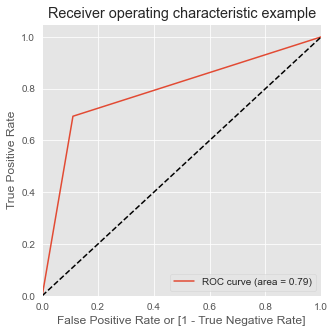

In [131]:
# Calling the function

draw_roc(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion)

The are under the curve is 0.79 which is good enough

### Finding Optimal Cutoff Point

Now, we saw that the ROC curve essentially shows you a trade-off between the sensitivity and specificity. But how do we find the optimal threshold in order to get a decent accuracy, sensitivity, as well as specificity?

**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Actual_Converted  Conversion_Prob  CustID  Predicted_Conversion  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0                 0         0.397016    7896                     0    1    1    1    1    0    0    0    0    0    0
1                 1         0.086191    8701                     0    1    0    0    0    0    0    0    0    0    0
2                 1         0.877008    6665                     1    1    1    1    1    1    1    1    1    1    0
3                 1         0.983273    8087                     1    1    1    1    1    1    1    1    1    1    1
4                 0         0.575861    2466                     1    1    1    1    1    1    1    0    0    0    0

In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377013  1.000000  0.000000
0.1   0.1  0.651290  0.971381  0.457580
0.2   0.2  0.771384  0.907507  0.689006
0.3   0.3  0.802033  0.849855  0.773092
0.4   0.4  0.817201  0.784737  0.836847
0.5   0.5  0.815794  0.693488  0.889809
0.6   0.6  0.814073  0.630859  0.924950
0.7   0.7  0.799062  0.549564  0.950050
0.8   0.8  0.777482  0.455827  0.972139
0.9   0.9  0.724159  0.284944  0.989960


### <font color = Green > Insights </font>

+ As you can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. 
+ And at about 0.4, the three metrics seem to be very close with decent values. At the cut-off of 0.4, the metric values are 0.81, 0.78, and 0.83 respectively and hence we choose 0.4 as the optimal cut-off point. 

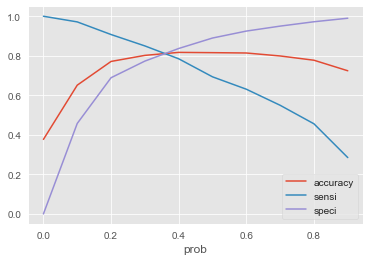

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**The above graph showcases that at about 0.35, the three metrics intersect.**

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

Now, we could've chosen any other cut-off point as well based on which of these metrics we want to be high. If we want to capture the 'Converted' better, we could have let go of a little accuracy and would've chosen an even lower cut-off and vice-versa. It is completely dependent on the situation we're in. In this case, we just chose the 'Optimal' cut-off point to give you a fair idea of how the thresholds should be chosen. 

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Actual_Converted  Conversion_Prob  CustID  Predicted_Conversion  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0                 0         0.397016    7896                     0    1    1    1    1    0    0    0    0    0    0                1
1                 1         0.086191    8701                     0    1    0    0    0    0    0    0    0    0    0                0
2                 1         0.877008    6665                     1    1    1    1    1    1    1    1    1    1    0                1
3                 1         0.983273    8087                     1    1    1    1    1    1    1    1    1    1    1                1
4                 0         0.575861    2466                     1    1    1    1    1    1    1    0    0    0    0                1

In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted)

0.8118842845973416

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Converted, y_train_pred_final.final_predicted)
confusion2

array([[3221,  763],
       [ 440, 1971]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8175031107424305

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8084839357429718

In [141]:
# Calculate True postive rate - predicting churn when customer does not have churned
print(TP/ float(TP+FN))

0.8175031107424305


In [142]:
# Calculate False postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1915160642570281


### <font color = Green > Insights </font>



### Precision and Recall

Now, apart from sensitivity and specificity, there are two more metrics that are widely used in the industry which you should know about. They're known as **'Precision' and 'Recall'**. Now, these metrics are very similar to sensitivity and specificity; it's just that knowing the exact terminologies can be helpful as both of these pairs of metrics are often used in the industry.

+ Actual/Predicted       	Not Churn    Churn
     - Not Churn	           TN	      FP
     - Churn	               FN         TP

Let's go through the definitions of precision and recall once again:

**Precision: Probability that a predicted 'Yes' is actually a 'Yes'**. Out of Actual 'True / Yes / 1 " we predicted some " True / Yes / 1", how many are actually "True / Yes / 1". "How much accurate / precise were you in predcited?"

    Precision = TP / (TP + FP). Precision is related to Predicted values, hence will focus on Predicted columns in matrix (FP and TP)

Remember that **'Precision' is the same as the 'Positive Predictive Value'** that you learnt about earlier. From now on, we will call it precision.

**Recall: Probability that an actual 'Yes' case is predicted correctly.** Out of all the Actual 'True / Yes / 1' cases, how many could you get right out of the all actuals? It is also know as "Detection Rate" in Industry. 
    
    Recall = TP / (TP + FN). Recall is related to Actual, hence will focus on Actual columbs in matrx (FN and TP)
    
Remember that **'Recall' is exactly the same as sensitivity**. Don't get confused between these.

In [143]:
from sklearn.metrics import precision_score, recall_score

##### Precision
TP / TP + FP

In [144]:
# Precision Score from sklearn

P = precision_score(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion)
P

0.7920416864045476

##### Recall
TP / TP + FN

In [145]:
# Recall Score from sklearn

R = recall_score(y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion)
R

0.693488179178764

### F-1 Score

**The F1-score is useful when you want to look at the performance of precision and recall together.**

In [146]:
F1_score = (2 * P * R) / (P + R)
F1_score

0.7394957983193277

### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Actual_Converted, y_train_pred_final.Predicted_Conversion

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6390    0
 6391    0
 6392    1
 6393    1
 6394    1
 Name: Actual_Converted, Length: 6395, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6390    0
 6391    0
 6392    0
 6393    0
 6394    1
 Name: Predicted_Conversion, Length: 6395, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Converted, y_train_pred_final.Conversion_Prob)

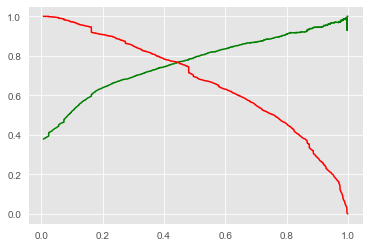

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Precision will plot in green and Recall will plot in red.**

+ The cutoff suggested is around 0.42
+ When Precision is very very low, say near 0, Recall is very very high, near 1 i.e everything is 1, means even the things which are 1 is 1. 
+ On the other end, Recall is very low and Precision is very high. 
+ Towards the end of precision line, you can see it is bit jumpy, this is because of the change in cutoff range there is a change in the true 1's changing in respect to its denominator nature of the formula (TP + FP), means what you have identified as 1s but are actually not true 1s. Where in case of Recall, the denominator is fixed, i.e amout of true 1's are fixed. 

As you can see, the curve is similar to what you got for sensitivity and specificity. Except now, the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. (TP + FP)
is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, you get a very jumpy curve.

## 7. Predictions on the test set

Now, we will go forward with the sensitivity-specificity view of things and make predictions based on the 0.35 cut-off that we decided earlier. Note that now we are making predictions on the test set, so we have to choose one threshold that we determined during the training phase. Now, you can choose either the sensitivity-specificity view (where the cut-off came to be 0.35) or the precision-recall view (where the cut-off came to be 0.42) when making predictions. Here, we have chosen the sensitivity-specificity view and hence are going with the 0.35 cut-off determined during the training phase.

In [151]:
# Scalling the features first

X_test[['total_visits', 'time_on_website', 'page_views_per_visit']] = scaler.transform(X_test[['total_visits', 'time_on_website', 'page_views_per_visit']])

In [152]:
X_test = X_test[col]
X_test.head()

do_not_email  time_on_website  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  lead_source_Reference  last_activity_Olark Chat Conversation  last_activity_Other Activities  last_activity_SMS Sent  last_notable_activity_Other Notable Activities  last_notable_activity_SMS Sent  source_reference_Word Of Mouth  course_selection_criteria_Better Career Prospects  occupation_status_Other  occupation_status_Student  occupation_status_Working Professional  lead_profile_Potential Lead  lead_profile_Student of SomeSchool
5499             1         1.477067                                    1                          0                      0                                      0                               1                       0                                               1                               0                               0                                                  1                        0                          0                                       0                            0                                   0
1867             0         1.141801                                    0                          1                      0                                      0                               0                       0                                               0                               0                               0                                                  1                        0                          0                                       0                            0                                   0
8284             0        -0.285367                                    1                          0                      0                                      0                               0                       0                                               0                               0                               0                                                  1                        0                          0                                       0                            0                                   0
3522             0         2.195231                                    1                          0                      0                                      0                               0                       1                                               0                               1                               0                                                  1                        0                          0                                       0                            0                                   0
7786             1        -0.758037                                    1                          0                      0                                      0                               1                       0                                               1                               0                               0                                                  0                        0                          0                                       0                            0                                   0

In [153]:
# Adding the constant here

X_test_sm = sm.add_constant(X_test)

**Making predictions on the test set**

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
# Gives you probability scores

y_test_pred[:10]

5499    0.285984
1867    0.981602
8284    0.127336
3522    0.878862
7786    0.019336
8073    0.982245
923     0.723417
2220    0.052520
1857    0.609124
4021    0.047621
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head
y_pred_1.head()

0
5499  0.285984
1867  0.981602
8284  0.127336
3522  0.878862
7786  0.019336

In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

converted
5499          1
1867          1
8284          1
3522          1
7786          0
...         ...
2741          0
568           1
947           1
3790          1
4500          0

[2741 rows x 1 columns]

In [159]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

converted  CustID
5499          1    5499
1867          1    1867
8284          1    8284
3522          1    3522
7786          0    7786
...         ...     ...
2741          0    2741
568           1     568
947           1     947
3790          1    3790
4500          0    4500

[2741 rows x 2 columns]

In [160]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

converted  CustID         0
0          1    5499  0.285984
1          1    1867  0.981602
2          1    8284  0.127336
3          1    3522  0.878862
4          0    7786  0.019336

In [162]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

converted  CustID  Conversion_Prob
0          1    5499         0.285984
1          1    1867         0.981602
2          1    8284         0.127336
3          1    3522         0.878862
4          0    7786         0.019336

In [163]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['CustID','converted','Conversion_Prob'], axis=1)

In [164]:
# Let's see the head of y_pred_final
y_pred_final = y_pred_final.replace('converted', 'Actual_Converted')
y_pred_final.head()

CustID  converted  Conversion_Prob
0    5499          1         0.285984
1    1867          1         0.981602
2    8284          1         0.127336
3    3522          1         0.878862
4    7786          0         0.019336

In [165]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [166]:
y_pred_final.head()

CustID  converted  Conversion_Prob  final_predicted
0    5499          1         0.285984                0
1    1867          1         0.981602                1
2    8284          1         0.127336                0
3    3522          1         0.878862                1
4    7786          0         0.019336                0

In [167]:
# Let's check the overall accuracy: 

metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.8267055819044145

### <font color = Green > Insights </font>

Accuracy On Train set we had: 81.18%

+ This is better than earlier. 

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1360,  275],
       [ 200,  906]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [170]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8191681735985533

### <font color = Green > Insights </font>

Sensitivity on the train set: 81.75%
    
+ This is more or less same as earlier

In [171]:
# Let us calculate specificity

TN / float(TN+FP)

0.8318042813455657

### <font color = Green > Insights </font>

Specificity on the train set: 80.84%
    
+ This is better than earlier as the choice of cutoff is a good trade off fit

### <font color = Green > Conclusion: There is agood balance between the Sensitivity and Specificity </font>

The metrics seem to hold on the test dataset as well. So, it looks like we have created a decent model for the churn dataset as the metrics are decent for both the training and test datasets.

### <font color = Green > Final Model Summary: </font>

1. Overall accuracy on Test set: 82.67%
2. Sensitivity of our logistic regression test model: 82%
3. Specificity of our logistic regression test model: 83%


In [172]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6395
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2502.6
Date:                Tue, 07 Dec 2021   Deviance:                       5005.3
Time:                        01:44:18   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -1.6930      0.095    -17.914      0.000      -1.878      -1.508
do_not_email                                         -1.2312      0.181     -6.807      0.000      -1.586      -0.877
time_on_website                                       0.9465      0.037     25.244      0.000       0.873       1.020
lead_origin_Landing Page Submission                  -0.8575      0.081    -10.581      0.000      -1.016      -0.699
lead_origin_Lead Add Form                             3.6934      0.385      9.604      0.000       2.940       4.447
lead_source_Reference                                -1.7424      0.425     -4.097      0.000      -2.576      -0.909
last_activity_Olark Chat Conversation                -1.1819      0.175     -6.753      0.000      -1.525      -0.839
last_activity_Other Activities                       -0.5104      0.189     -2.706      0.007      -0.880      -0.141
last_activity_SMS Sent                                0.5049      0.145      3.489      0.000       0.221       0.788
last_notable_activity_Other Notable Activities        1.0833      0.252      4.291      0.000       0.588       1.578
last_notable_activity_SMS Sent                        1.0538      0.152      6.924      0.000       0.755       1.352
source_reference_Word Of Mouth                        0.5429      0.171      3.175      0.001       0.208       0.878
course_selection_criteria_Better Career Prospects     0.8958      0.093      9.618      0.000       0.713       1.078
occupation_status_Other                               1.1152      0.499      2.235      0.025       0.137       2.093
occupation_status_Student                             0.9146      0.270      3.393      0.001       0.386       1.443
occupation_status_Working Professional                2.1413      0.183     11.678      0.000       1.782       2.501
lead_profile_Potential Lead                           1.6193      0.101     16.092      0.000       1.422       1.817
lead_profile_Student of SomeSchool                   -2.0871      0.432     -4.834      0.000      -2.933      -1.241
=====================================================================================================================
"""

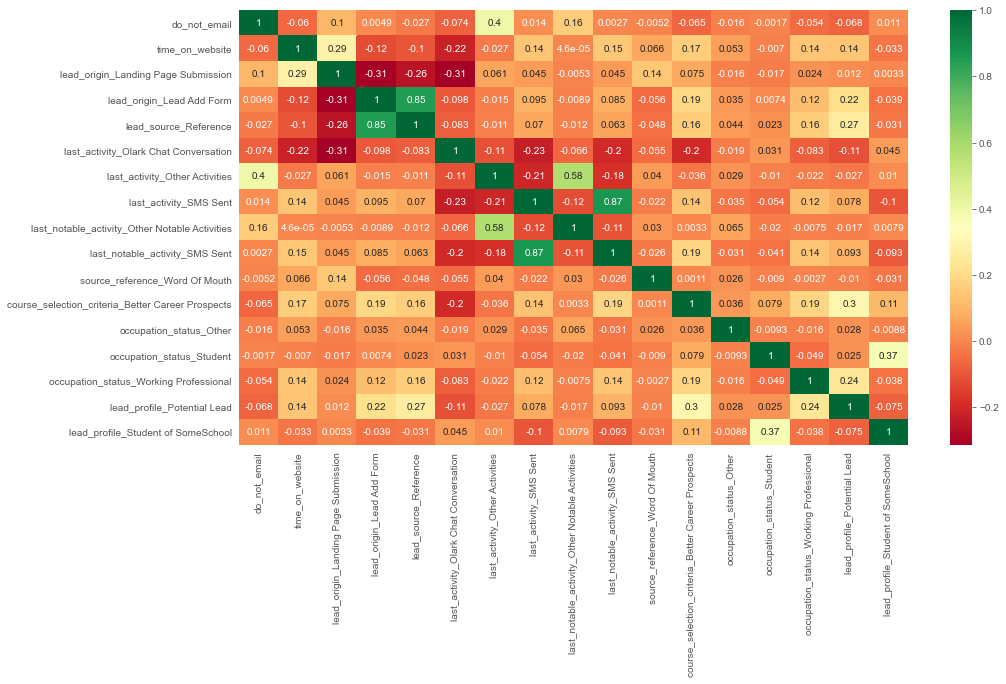

In [173]:
# Analysis of columns in our final model w.r.t. 'Converted'

plt.figure(figsize=(15, 8))
sns.heatmap(X_test.corr(), cmap="RdYlGn",annot=True)
plt.show()

### <font color = Green > Final Insights </font>

It was found that the variables that mattered the most in the potential buyers are:

1. Total time spend on the Website.
2. Lead originated from:
    + Landing Page Submission
    + Lead Add Form
3. Lead source through reference
4. When the leads last activity was:
    + SMS
    + Olark chat conversation
    + Other activities
5. When the leads last notable activity was 
    + SMS &
    + All other notable activities
5. Source Reference was Word of mouth. 
6. Course Selection criteria was Better Career Prospects. 
7. When their current occupation is as a working professional or student. 
8. Lead profiles from all Potential Leads & Student of SomeSchool 

Top 7 variables in model, that contribute towards lead conversion and should be focused on:

      - Total Time Spent on Website 
      - Lead originated from Landing Page Submission & Lead Add Form (positively impacting)
      - lead source_Reference (negatively impacting)
      - Last Activity and Last Notable Activity both for SMS Sent 
      - Lead Activity from Olark Chat Conversation (negatively impacting)
      - Occupation Status as Working Professional 	
      - Lead profiles from Student of Someshcool (negatively impacting)